In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-case-study/out_time.csv
/kaggle/input/hr-analytics-case-study/general_data.csv
/kaggle/input/hr-analytics-case-study/employee_survey_data.csv
/kaggle/input/hr-analytics-case-study/data_dictionary.xlsx
/kaggle/input/hr-analytics-case-study/manager_survey_data.csv
/kaggle/input/hr-analytics-case-study/in_time.csv


# Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -


-  The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.


Since you are one of the star analysts at the firm, this project has been given to you.

# Goal of the case study

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

# Step 1: Importing and Merging Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
in_time = pd.read_csv('/kaggle/input/hr-analytics-case-study/in_time.csv')
manager_survey_data = pd.read_csv('/kaggle/input/hr-analytics-case-study/manager_survey_data.csv')
employee_survey_data = pd.read_csv('/kaggle/input/hr-analytics-case-study/employee_survey_data.csv')
data_dictionary= pd.read_excel('/kaggle/input/hr-analytics-case-study/data_dictionary.xlsx')
out_time = pd.read_csv('/kaggle/input/hr-analytics-case-study/out_time.csv')
general_data = pd.read_csv('/kaggle/input/hr-analytics-case-study/general_data.csv')


In [6]:
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         NaN   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         NaN  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         NaN  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                  NaN   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

In [7]:
in_time.shape

(4410, 262)

In [8]:
in_time=in_time.replace(np.nan,0)
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         0.0  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         0.0  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         0.0  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         0.0  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         0.0  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                    0  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         0.0   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         0.0   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         0.0   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         0.0   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         0.0   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                    0   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                    0   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         0.0  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         0.0  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         0.0  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         0.0  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         0.0  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                    0  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                    0   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

In [9]:

in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [10]:
in_time.head()

Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1 1970-01-01 2015-01-02 09:43:45 2015-01-05 10:08:48   
1           2 1970-01-01 2015-01-02 10:15:44 2015-01-05 10:21:05   
2           3 1970-01-01 2015-01-02 10:17:41 2015-01-05 09:50:50   
3           4 1970-01-01 2015-01-02 10:05:06 2015-01-05 09:56:32   
4           5 1970-01-01 2015-01-02 10:28:17 2015-01-05 09:49:58   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 09:54:26 2015-01-07 09:34:31 2015-01-08 09:51:09   
1 1970-01-01 00:00:00 2015-01-07 09:45:17 2015-01-08 10:09:04   
2 2015-01-06 10:14:13 2015-01-07 09:47:27 2015-01-08 10:03:40   
3 2015-01-06 10:11:07 2015-01-07 09:37:30 2015-01-08 10:02:08   
4 2015-01-06 09:45:28 2015-01-07 09:49:37 2015-01-08 10:19:44   

           2015-01-09          2015-01-12          2015-01-13 2015-01-14  \
0 2015-01-09 10:09:25 2015-01-12 09:42:53 2015-01-13 10:13:06 1970-01-01   
1 2015-01-09 09:43:26 2015-01-12 10:00:07 2015-01-13 10:43:29 1970-01-01   
2 2015-01-09 10:05:49 2015-01-12 10:03:47 2015-01-13 10:21:26 1970-01-01   
3 2015-01-09 10:08:12 2015-01-12 10:13:42 2015-01-13 09:53:22 1970-01-01   
4 2015-01-09 10:00:50 2015-01-12 10:29:27 2015-01-13 09:59:32 1970-01-01   

           2015-01-15          2015-01-16          2015-01-19  \
0 2015-01-15 10:01:24 2015-01-16 10:19:08 1970-01-01 00:00:00   
1 2015-01-15 09:37:57 2015-01-16 09:57:18 2015-01-19 10:23:43   
2 2015-01-15 09:55:11 2015-01-16 10:05:36 2015-01-19 09:47:53   
3 2015-01-15 10:00:50 2015-01-16 09:58:06 2015-01-19 09:43:11   
4 2015-01-15 10:06:12 2015-01-16 10:03:50 1970-01-01 00:00:00   

           2015-01-20          2015-01-21          2015-01-22  \
0 2015-01-20 09:50:34 2015-01-21 09:49:42 2015-01-22 09:47:45   
1 2015-01-20 09:29:03 2015-01-21 09:46:45 2015-01-22 10:03:51   
2 2015-01-20 09:57:09 2015-01-21 10:29:40 2015-01-22 09:59:11   
3 2015-01-20 10:29:06 2015-01-21 10:04:33 2015-01-22 09:51:07   
4 2015-01-20 10:10:29 2015-01-21 10:28:15 2015-01-22 10:10:10   

           2015-01-23 2015-01-26          2015-01-27          2015-01-28  \
0 2015-01-23 09:23:44 1970-01-01 2015-01-27 09:50:37 2015-01-28 09:56:13   
1 2015-01-23 09:20:06 1970-01-01 2015-01-27 10:07:48 2015-01-28 10:08:25   
2 2015-01-23 10:16:34 1970-01-01 2015-01-27 10:07:30 2015-01-28 10:05:43   
3 2015-01-23 09:56:56 1970-01-01 2015-01-27 09:48:31 2015-01-28 10:00:39   
4 2015-01-23 09:34:34 1970-01-01 2015-01-27 09:56:59 2015-01-28 09:45:03   

           2015-01-29          2015-01-30          2015-02-02  \
0 2015-01-29 09:53:47 2015-01-30 10:09:26 2015-02-02 09:38:43   
1 2015-01-29 09:52:04 2015-01-30 09:49:49 2015-02-02 10:07:26   
2 2015-01-29 10:06:48 2015-01-30 10:14:36 2015-02-02 09:54:45   
3 2015-01-29 09:49:28 2015-01-30 09:56:31 2015-02-02 10:14:08   
4 2015-01-29 10:11:41 2015-01-30 10:24:50 2015-02-02 09:43:27   

           2015-02-03          2015-02-04          2015-02-05  \
0 2015-02-03 10:23:38 2015-02-04 09:48:37 2015-02-05 09:52:36   
1 2015-02-03 09:55:45 2015-02-04 10:25:41 2015-02-05 10:05:11   
2 2015-02-03 09:27:11 2015-02-04 10:04:03 2015-02-05 10:08:11   
3 2015-02-03 10:01:31 2015-02-04 10:31:44 2015-02-05 10:02:39   
4 2015-02-03 09:55:59 2015-02-04 10:03:25 2015-02-05 10:02:17   

           2015-02-06          2015-02-09          2015-02-10  \
0 2015-02-06 09:53:23 2015-02-09 10:01:45 2015-02-10 10:14:18   
1 2015-02-06 09:12:39 1970-01-01 00:00:00 2015-02-10 10:10:13   
2 2015-02-06 10:23:51 2015-02-09 10:08:43 2015-02-10 10:26:18   
3 2015-02-06 09:24:21 2015-02-09 09:56:27 1970-01-01 00:00:00   
4 2015-02-06 09:55:43 2015-02-09 10:15:16 2015-02-10 09:43:48   

           2015-02-11          2015-02-12          2015-02-13  \
0 2015-02-11 10:18:44 2015-02-12 10:10:35 2015-02-13 09:13:07   
1 2015-02-11 09:40:20 2015-02-12 10:10:09 2015-02-13 09:35:25   
2 2015-02-11 10:02:13 2015-02-12 09:55:10 2015-02-13 10:32:34   
3 2015-02-11 10:00:32 2015-02-12 10:01:48 2015-02-13 10:14:10   
4 2015-02

In [11]:
out_time=out_time.replace(np.nan,0)
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         0.0  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         0.0  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         0.0  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         0.0  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         0.0  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                    0  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58         0.0   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13         0.0   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25         0.0   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45         0.0   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58         0.0   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 17:22:13  2015-01-16 17:35:11                    0   
1  2015-01-15 17:14:44  2015-01-16 17:40:57  2015-01-19 17:58:22   
2  2015-01-15 17:21:29  2015-01-16 17:18:13  2015-01-19 16:52:13   
3  2015-01-15 16:53:26  2015-01-16 16:52:34  2015-01-19 16:14:18   
4  2015-01-15 18:21:48  2015-01-16 18:28:03                    0   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 16:37:07  2015-01-21 16:55:24  2015-01-22 16:50:47   
1  2015-01-20 17:05:13  2015-01-21 17:41:05  2015-01-22 17:26:26   
2  2015-01-20 16:52:23  2015-01-21 17:17:50  2015-01-22 17:27:54   
3  2015-01-20 17:39:50  2015-01-21 16:46:51  2015-01-22 16:51:48   
4  2015-01-20 17:59:24  2015-01-21 18:41:38  2015-01-22 18:27:37   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 17:00:01         0.0  2015-01-27 17:28:22  2015-01-28 17:03:21   
1  2015-01-23 17:06:50         0.0  2015-01-27 17:35:50  2015-01-28 17:19:48   
2  2015-01-23 17:11:52         0.0  2015-01-27 17:22:27  2015-01-28 16:24:04   
3  2015-01-23 17:05:41         0.0  2015-01-27 17:03:48  2015-01-28 17:33:22   
4  2015-01-23 16:53:11         0.0  2015-01-27 17:52:43  2015-01-28 17:40:46   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 17:18:36  2015-01-30 17:00:25  2015-02-02 16:32:49   
1  2015-01-29 17:07:38  2015-01-30 16:53:22  2015-02-02 17:45:18   
2  2015-01-29 17:20:07  2015-01-30 17:16:03  2015-02-02 16:59:01   
3  2015-01-29 16:44:01  2015-01-30 17:09:42  2015-02-02 17:18:12   
4  2015-01-29 18:16:26  2015-01-30 18:26:33  2015-02-02 17:53:21   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 17:35:49  2015-02-04 17:24:56  2015-02-05 17:26:31   
1  2015-02-03 17:33:42  2015-02-04 18:04:20  2015-02-05 17:43:25   
2  2015-02-03 15:58:24  2015-02-04 17:25:54  2015-02-05 16:29:41   
3  2015-02-03 17:27:41  2015-02-04 17:30:22  2015-02-05 17:11:44   
4  2015-02-03 17:57:43  2015-02-04 18:03:13  2015-02-05 18:07:43   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 17:21:35  2015-02-09 17:37:50  2015-02-10 17:30:20   
1  2015-02-06 17:06:42                    0  2015-02-10 18:12:17   
2  2015-02-06 17:18:15  2015-02-09 16:48:18  2015-02-10 17:15:49   
3  2015-02-06 16:33:04  2015-02-09 17:16:29                    0   
4  2015-02-06 17:38:14  2015-02-09 18:26:28  2015-02-10 17:24:32   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 17:30:19  2015-02-12 17:36:42  2015-02-13 16:25:26   
1  2015-02-11 17:18:36  

In [12]:
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [13]:
out_time.head()

Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1 1970-01-01 2015-01-02 16:56:15 2015-01-05 17:20:11   
1           2 1970-01-01 2015-01-02 18:22:17 2015-01-05 17:48:22   
2           3 1970-01-01 2015-01-02 16:59:14 2015-01-05 17:06:46   
3           4 1970-01-01 2015-01-02 17:25:24 2015-01-05 17:14:03   
4           5 1970-01-01 2015-01-02 18:31:37 2015-01-05 17:49:15   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 17:19:05 2015-01-07 16:34:55 2015-01-08 17:08:32   
1 1970-01-01 00:00:00 2015-01-07 17:09:06 2015-01-08 17:34:04   
2 2015-01-06 16:38:32 2015-01-07 16:33:21 2015-01-08 17:24:22   
3 2015-01-06 17:07:42 2015-01-07 16:32:40 2015-01-08 16:53:11   
4 2015-01-06 17:26:25 2015-01-07 17:37:59 2015-01-08 17:59:28   

           2015-01-09          2015-01-12          2015-01-13 2015-01-14  \
0 2015-01-09 17:38:29 2015-01-12 16:58:39 2015-01-13 18:02:58 1970-01-01   
1 2015-01-09 16:52:29 2015-01-12 17:36:48 2015-01-13 18:00:13 1970-01-01   
2 2015-01-09 16:57:30 2015-01-12 17:28:54 2015-01-13 17:21:25 1970-01-01   
3 2015-01-09 17:19:47 2015-01-12 17:13:37 2015-01-13 17:11:45 1970-01-01   
4 2015-01-09 17:44:08 2015-01-12 18:51:21 2015-01-13 18:14:58 1970-01-01   

           2015-01-15          2015-01-16          2015-01-19  \
0 2015-01-15 17:22:13 2015-01-16 17:35:11 1970-01-01 00:00:00   
1 2015-01-15 17:14:44 2015-01-16 17:40:57 2015-01-19 17:58:22   
2 2015-01-15 17:21:29 2015-01-16 17:18:13 2015-01-19 16:52:13   
3 2015-01-15 16:53:26 2015-01-16 16:52:34 2015-01-19 16:14:18   
4 2015-01-15 18:21:48 2015-01-16 18:28:03 1970-01-01 00:00:00   

           2015-01-20          2015-01-21          2015-01-22  \
0 2015-01-20 16:37:07 2015-01-21 16:55:24 2015-01-22 16:50:47   
1 2015-01-20 17:05:13 2015-01-21 17:41:05 2015-01-22 17:26:26   
2 2015-01-20 16:52:23 2015-01-21 17:17:50 2015-01-22 17:27:54   
3 2015-01-20 17:39:50 2015-01-21 16:46:51 2015-01-22 16:51:48   
4 2015-01-20 17:59:24 2015-01-21 18:41:38 2015-01-22 18:27:37   

           2015-01-23 2015-01-26          2015-01-27          2015-01-28  \
0 2015-01-23 17:00:01 1970-01-01 2015-01-27 17:28:22 2015-01-28 17:03:21   
1 2015-01-23 17:06:50 1970-01-01 2015-01-27 17:35:50 2015-01-28 17:19:48   
2 2015-01-23 17:11:52 1970-01-01 2015-01-27 17:22:27 2015-01-28 16:24:04   
3 2015-01-23 17:05:41 1970-01-01 2015-01-27 17:03:48 2015-01-28 17:33:22   
4 2015-01-23 16:53:11 1970-01-01 2015-01-27 17:52:43 2015-01-28 17:40:46   

           2015-01-29          2015-01-30          2015-02-02  \
0 2015-01-29 17:18:36 2015-01-30 17:00:25 2015-02-02 16:32:49   
1 2015-01-29 17:07:38 2015-01-30 16:53:22 2015-02-02 17:45:18   
2 2015-01-29 17:20:07 2015-01-30 17:16:03 2015-02-02 16:59:01   
3 2015-01-29 16:44:01 2015-01-30 17:09:42 2015-02-02 17:18:12   
4 2015-01-29 18:16:26 2015-01-30 18:26:33 2015-02-02 17:53:21   

           2015-02-03          2015-02-04          2015-02-05  \
0 2015-02-03 17:35:49 2015-02-04 17:24:56 2015-02-05 17:26:31   
1 2015-02-03 17:33:42 2015-02-04 18:04:20 2015-02-05 17:43:25   
2 2015-02-03 15:58:24 2015-02-04 17:25:54 2015-02-05 16:29:41   
3 2015-02-03 17:27:41 2015-02-04 17:30:22 2015-02-05 17:11:44   
4 2015-02-03 17:57:43 2015-02-04 18:03:13 2015-02-05 18:07:43   

           2015-02-06          2015-02-09          2015-02-10  \
0 2015-02-06 17:21:35 2015-02-09 17:37:50 2015-02-10 17:30:20   
1 2015-02-06 17:06:42 1970-01-01 00:00:00 2015-02-10 18:12:17   
2 2015-02-06 17:18:15 2015-02-09 16:48:18 2015-02-10 17:15:49   
3 2015-02-06 16:33:04 2015-02-09 17:16:29 1970-01-01 00:00:00   
4 2015-02-06 17:38:14 2015-02-09 18:26:28 2015-02-10 17:24:32   

           2015-02-11          2015-02-12          2015-02-13  \
0 2015-02-11 17:30:19 2015-02-12 17:36:42 2015-02-13 16:25:26   
1 2015-02-11 17:18:36 2015-02-12 18:08:01 2015-02-13 17:19:25   
2 2015-02-11 16:49:22 2015-02-12 16:22:31 2015-02-13 17:41:15   
3 2015-02-11 17:04:11 2015-02-12 17:22:16 2015-02-13 17:22:54   
4 2015-02

In [14]:
in_time=in_time.append(out_time)

In [15]:
in_time.head()

Unnamed: 0 2015-01-01          2015-01-02          2015-01-05  \
0           1 1970-01-01 2015-01-02 09:43:45 2015-01-05 10:08:48   
1           2 1970-01-01 2015-01-02 10:15:44 2015-01-05 10:21:05   
2           3 1970-01-01 2015-01-02 10:17:41 2015-01-05 09:50:50   
3           4 1970-01-01 2015-01-02 10:05:06 2015-01-05 09:56:32   
4           5 1970-01-01 2015-01-02 10:28:17 2015-01-05 09:49:58   

           2015-01-06          2015-01-07          2015-01-08  \
0 2015-01-06 09:54:26 2015-01-07 09:34:31 2015-01-08 09:51:09   
1 1970-01-01 00:00:00 2015-01-07 09:45:17 2015-01-08 10:09:04   
2 2015-01-06 10:14:13 2015-01-07 09:47:27 2015-01-08 10:03:40   
3 2015-01-06 10:11:07 2015-01-07 09:37:30 2015-01-08 10:02:08   
4 2015-01-06 09:45:28 2015-01-07 09:49:37 2015-01-08 10:19:44   

           2015-01-09          2015-01-12          2015-01-13 2015-01-14  \
0 2015-01-09 10:09:25 2015-01-12 09:42:53 2015-01-13 10:13:06 1970-01-01   
1 2015-01-09 09:43:26 2015-01-12 10:00:07 2015-01-13 10:43:29 1970-01-01   
2 2015-01-09 10:05:49 2015-01-12 10:03:47 2015-01-13 10:21:26 1970-01-01   
3 2015-01-09 10:08:12 2015-01-12 10:13:42 2015-01-13 09:53:22 1970-01-01   
4 2015-01-09 10:00:50 2015-01-12 10:29:27 2015-01-13 09:59:32 1970-01-01   

           2015-01-15          2015-01-16          2015-01-19  \
0 2015-01-15 10:01:24 2015-01-16 10:19:08 1970-01-01 00:00:00   
1 2015-01-15 09:37:57 2015-01-16 09:57:18 2015-01-19 10:23:43   
2 2015-01-15 09:55:11 2015-01-16 10:05:36 2015-01-19 09:47:53   
3 2015-01-15 10:00:50 2015-01-16 09:58:06 2015-01-19 09:43:11   
4 2015-01-15 10:06:12 2015-01-16 10:03:50 1970-01-01 00:00:00   

           2015-01-20          2015-01-21          2015-01-22  \
0 2015-01-20 09:50:34 2015-01-21 09:49:42 2015-01-22 09:47:45   
1 2015-01-20 09:29:03 2015-01-21 09:46:45 2015-01-22 10:03:51   
2 2015-01-20 09:57:09 2015-01-21 10:29:40 2015-01-22 09:59:11   
3 2015-01-20 10:29:06 2015-01-21 10:04:33 2015-01-22 09:51:07   
4 2015-01-20 10:10:29 2015-01-21 10:28:15 2015-01-22 10:10:10   

           2015-01-23 2015-01-26          2015-01-27          2015-01-28  \
0 2015-01-23 09:23:44 1970-01-01 2015-01-27 09:50:37 2015-01-28 09:56:13   
1 2015-01-23 09:20:06 1970-01-01 2015-01-27 10:07:48 2015-01-28 10:08:25   
2 2015-01-23 10:16:34 1970-01-01 2015-01-27 10:07:30 2015-01-28 10:05:43   
3 2015-01-23 09:56:56 1970-01-01 2015-01-27 09:48:31 2015-01-28 10:00:39   
4 2015-01-23 09:34:34 1970-01-01 2015-01-27 09:56:59 2015-01-28 09:45:03   

           2015-01-29          2015-01-30          2015-02-02  \
0 2015-01-29 09:53:47 2015-01-30 10:09:26 2015-02-02 09:38:43   
1 2015-01-29 09:52:04 2015-01-30 09:49:49 2015-02-02 10:07:26   
2 2015-01-29 10:06:48 2015-01-30 10:14:36 2015-02-02 09:54:45   
3 2015-01-29 09:49:28 2015-01-30 09:56:31 2015-02-02 10:14:08   
4 2015-01-29 10:11:41 2015-01-30 10:24:50 2015-02-02 09:43:27   

           2015-02-03          2015-02-04          2015-02-05  \
0 2015-02-03 10:23:38 2015-02-04 09:48:37 2015-02-05 09:52:36   
1 2015-02-03 09:55:45 2015-02-04 10:25:41 2015-02-05 10:05:11   
2 2015-02-03 09:27:11 2015-02-04 10:04:03 2015-02-05 10:08:11   
3 2015-02-03 10:01:31 2015-02-04 10:31:44 2015-02-05 10:02:39   
4 2015-02-03 09:55:59 2015-02-04 10:03:25 2015-02-05 10:02:17   

           2015-02-06          2015-02-09          2015-02-10  \
0 2015-02-06 09:53:23 2015-02-09 10:01:45 2015-02-10 10:14:18   
1 2015-02-06 09:12:39 1970-01-01 00:00:00 2015-02-10 10:10:13   
2 2015-02-06 10:23:51 2015-02-09 10:08:43 2015-02-10 10:26:18   
3 2015-02-06 09:24:21 2015-02-09 09:56:27 1970-01-01 00:00:00   
4 2015-02-06 09:55:43 2015-02-09 10:15:16 2015-02-10 09:43:48   

           2015-02-11          2015-02-12          2015-02-13  \
0 2015-02-11 10:18:44 2015-02-12 10:10:35 2015-02-13 09:13:07   
1 2015-02-11 09:40:20 2015-02-12 10:10:09 2015-02-13 09:35:25   
2 2015-02-11 10:02:13 2015-02-12 09:55:10 2015-02-13 10:32:34   
3 2015-02-11 10:00:32 2015-02-12 10:01:48 2015-02-13 10:14:10   
4 2015-02

In [16]:
in_time=in_time.diff(periods=4410)
in_time=in_time.iloc[4410:]
in_time.reset_index(inplace=True)
in_time.head()

index  Unnamed: 0 2015-01-01 2015-01-02 2015-01-05 2015-01-06 2015-01-07  \
0      0         0.0     0 days   07:12:30   07:11:23   07:24:39   07:00:24   
1      1         0.0     0 days   08:06:33   07:27:17   00:00:00   07:23:49   
2      2         0.0     0 days   06:41:33   07:15:56   06:24:19   06:45:54   
3      3         0.0     0 days   07:20:18   07:17:31   06:56:35   06:55:10   
4      4         0.0     0 days   08:03:20   07:59:17   07:40:57   07:48:22   

  2015-01-08 2015-01-09 2015-01-12 2015-01-13 2015-01-14 2015-01-15  \
0   07:17:23   07:29:04   07:15:46   07:49:52     0 days   07:20:49   
1   07:25:00   07:09:03   07:36:41   07:16:44     0 days   07:36:47   
2   07:20:42   06:51:41   07:25:07   06:59:59     0 days   07:26:18   
3   06:51:03   07:11:35   06:59:55   07:18:23     0 days   06:52:36   
4   07:39:44   07:43:18   08:21:54   08:15:26     0 days   08:15:36   

  2015-01-16 2015-01-19 2015-01-20 2015-01-21 2015-01-22 2015-01-23  \
0   07:16:03   00:00:00   06:46:33   07:05:42   07:03:02   07:36:17   
1   07:43:39   07:34:39   07:36:10   07:54:20   07:22:35   07:46:44   
2   07:12:37   07:04:20   06:55:14   06:48:10   07:28:43   06:55:18   
3   06:54:28   06:31:07   07:10:44   06:42:18   07:00:41   07:08:45   
4   08:24:13   00:00:00   07:48:55   08:13:23   08:17:27   07:18:37   

  2015-01-26 2015-01-27 2015-01-28 2015-01-29 2015-01-30 2015-02-02  \
0     0 days   07:37:45   07:07:08   07:24:49   06:50:59   06:54:06   
1     0 days   07:28:02   07:11:23   07:15:34   07:03:33   07:37:52   
2     0 days   07:14:57   06:18:21   07:13:19   07:01:27   07:04:16   
3     0 days   07:15:17   07:32:43   06:54:33   07:13:11   07:04:04   
4     0 days   07:55:44   07:55:43   08:04:45   08:01:43   08:09:54   

  2015-02-03 2015-02-04 2015-02-05 2015-02-06 2015-02-09 2015-02-10  \
0   07:12:11   07:36:19   07:33:55   07:28:12   07:36:05   07:16:02   
1   07:37:57   07:38:39   07:38:14   07:54:03   00:00:00   08:02:04   
2   06:31:13   07:21:51   06:21:30   06:54:24   06:39:35   06:49:31   
3   07:26:10   06:58:38   07:09:05   07:08:43   07:20:02   00:00:00   
4   08:01:44   07:59:48   08:05:26   07:42:31   08:11:12   07:40:44   

  2015-02-11 2015-02-12 2015-02-13 2015-02-16 2015-02-17 2015-02-18  \
0   07:11:35   07:26:07   07:12:19   07:36:21   07:24:58   07:50:23   
1   07:38:16   07:57:52   07:44:00   07:41:57   07:24:25   07:54:14   
2   06:47:09   06:27:21   07:08:41   07:01:22   06:41:07   07:02:49   
3   07:03:39   07:20:28   07:08:44   07:21:01   07:06:38   06:52:21   
4   07:57:49   07:40:15   08:43:14   07:55:20   07:54:09   08:05:39   

  2015-02-19 2015-02-20 2015-02-23 2015-02-24 2015-02-25 2015-02-26  \
0   00:00:00   07:49:56   07:26:28   07:13:30   07:35:01   07:12:03   
1   07:54:46   07:25:27   08:15:20   07:48:00   07:45:08   07:50:48   
2   06:57:37   06:53:11   07:45:17   06:45:06   06:56:25   07:33:11   
3   07:31:25   06:41:52   07:10:47   07:03:51   06:16:50   07:21:29   
4   07:50:46   08:13:51   07:48:10   08:07:08   08:01:56   07:42:35   

  2015-02-27 2015-03-02 2015-03-03 2015-03-04 2015-03-05 2015-03-06  \
0   07:23:09   07:09:25   06:45:35   07:44:40     0 days   07:48:54   
1   08:07:13   07:40:54   07:41:37   07:55:39     0 days   07:20:23   
2   06:51:18   07:29:35   07:03:16   07:11:19     0 days   06:46:16   
3   07:15:50   00:00:00   07:24:12   06:27:49     0 days   00:00:00   
4   07:58:02   08:41:35   07:57:01   08:04:22     0 days   08:10:58   

  2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13 2015-03-16  \
0   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   00:00:00   
1   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   07:12:19   
2   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   06:45:38   
3   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   06:43:28   
4   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   07:47:23   

  2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23 2015-03-24  \
0   06:54:54   07:11:52   07:50:52   07:0

In [17]:
in_time.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)
in_time.head()

2015-01-01 2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08  \
0     0 days   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   
1     0 days   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   
2     0 days   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   
3     0 days   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   
4     0 days   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   

  2015-01-09 2015-01-12 2015-01-13 2015-01-14 2015-01-15 2015-01-16  \
0   07:29:04   07:15:46   07:49:52     0 days   07:20:49   07:16:03   
1   07:09:03   07:36:41   07:16:44     0 days   07:36:47   07:43:39   
2   06:51:41   07:25:07   06:59:59     0 days   07:26:18   07:12:37   
3   07:11:35   06:59:55   07:18:23     0 days   06:52:36   06:54:28   
4   07:43:18   08:21:54   08:15:26     0 days   08:15:36   08:24:13   

  2015-01-19 2015-01-20 2015-01-21 2015-01-22 2015-01-23 2015-01-26  \
0   00:00:00   06:46:33   07:05:42   07:03:02   07:36:17     0 days   
1   07:34:39   07:36:10   07:54:20   07:22:35   07:46:44     0 days   
2   07:04:20   06:55:14   06:48:10   07:28:43   06:55:18     0 days   
3   06:31:07   07:10:44   06:42:18   07:00:41   07:08:45     0 days   
4   00:00:00   07:48:55   08:13:23   08:17:27   07:18:37     0 days   

  2015-01-27 2015-01-28 2015-01-29 2015-01-30 2015-02-02 2015-02-03  \
0   07:37:45   07:07:08   07:24:49   06:50:59   06:54:06   07:12:11   
1   07:28:02   07:11:23   07:15:34   07:03:33   07:37:52   07:37:57   
2   07:14:57   06:18:21   07:13:19   07:01:27   07:04:16   06:31:13   
3   07:15:17   07:32:43   06:54:33   07:13:11   07:04:04   07:26:10   
4   07:55:44   07:55:43   08:04:45   08:01:43   08:09:54   08:01:44   

  2015-02-04 2015-02-05 2015-02-06 2015-02-09 2015-02-10 2015-02-11  \
0   07:36:19   07:33:55   07:28:12   07:36:05   07:16:02   07:11:35   
1   07:38:39   07:38:14   07:54:03   00:00:00   08:02:04   07:38:16   
2   07:21:51   06:21:30   06:54:24   06:39:35   06:49:31   06:47:09   
3   06:58:38   07:09:05   07:08:43   07:20:02   00:00:00   07:03:39   
4   07:59:48   08:05:26   07:42:31   08:11:12   07:40:44   07:57:49   

  2015-02-12 2015-02-13 2015-02-16 2015-02-17 2015-02-18 2015-02-19  \
0   07:26:07   07:12:19   07:36:21   07:24:58   07:50:23   00:00:00   
1   07:57:52   07:44:00   07:41:57   07:24:25   07:54:14   07:54:46   
2   06:27:21   07:08:41   07:01:22   06:41:07   07:02:49   06:57:37   
3   07:20:28   07:08:44   07:21:01   07:06:38   06:52:21   07:31:25   
4   07:40:15   08:43:14   07:55:20   07:54:09   08:05:39   07:50:46   

  2015-02-20 2015-02-23 2015-02-24 2015-02-25 2015-02-26 2015-02-27  \
0   07:49:56   07:26:28   07:13:30   07:35:01   07:12:03   07:23:09   
1   07:25:27   08:15:20   07:48:00   07:45:08   07:50:48   08:07:13   
2   06:53:11   07:45:17   06:45:06   06:56:25   07:33:11   06:51:18   
3   06:41:52   07:10:47   07:03:51   06:16:50   07:21:29   07:15:50   
4   08:13:51   07:48:10   08:07:08   08:01:56   07:42:35   07:58:02   

  2015-03-02 2015-03-03 2015-03-04 2015-03-05 2015-03-06 2015-03-09  \
0   07:09:25   06:45:35   07:44:40     0 days   07:48:54   07:24:31   
1   07:40:54   07:41:37   07:55:39     0 days   07:20:23   08:07:48   
2   07:29:35   07:03:16   07:11:19     0 days   06:46:16   06:50:49   
3   00:00:00   07:24:12   06:27:49     0 days   00:00:00   07:09:26   
4   08:41:35   07:57:01   08:04:22     0 days   08:10:58   08:21:23   

  2015-03-10 2015-03-11 2015-03-12 2015-03-13 2015-03-16 2015-03-17  \
0   06:55:23   07:09:40   07:04:48   07:18:37   00:00:00   06:54:54   
1   07:41:26   07:59:12   07:31:21   07:49:11   07:12:19   07:21:54   
2   06:52:23   07:04:47   07:16:32   06:49:17   06:45:38   07:07:15   
3   07:23:50   07:29:36   07:37:27   06:49:02   06:43:28   07:12:30   
4   08:03:53   08:08:37   08:05:01   08:03:07   07:47:23   07:57:01   

  2015-03-18 2015-03-19 2015-03-20 2015-03-23 2015-03-24 2015-03-25  \
0   07:11:52   07:50:52   07:09:45   07:36:59   07:15:07   07:26:44   
1   07:16:03   07

In [18]:
in_time.shape

(4410, 261)

In [19]:
in_time.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
             ], axis = 1,inplace=True) 

In [20]:
in_time.head()

2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21   07:21:25   07:51:54   
1   00:00:00   07

In [21]:
in_time['Actual Time']=in_time.mean(axis=1)

In [22]:
in_time['Actual Time'].head()

0   06:52:12.823293
1   07:18:57.493975
2   06:48:57.891566
3   06:47:21.172690
4   07:52:39.220883
Name: Actual Time, dtype: timedelta64[ns]

In [23]:
in_time['hrs']=in_time['Actual Time']/np.timedelta64(1, 'h')
in_time.head()

2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21   07:21:25   07:51:54   
1   00:00:00   07

In [24]:
in_time.reset_index(inplace=True)
in_time.head()

index 2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08 2015-01-09  \
0      0   07:12:30   07:11:23   07:24:39   07:00:24   07:17:23   07:29:04   
1      1   08:06:33   07:27:17   00:00:00   07:23:49   07:25:00   07:09:03   
2      2   06:41:33   07:15:56   06:24:19   06:45:54   07:20:42   06:51:41   
3      3   07:20:18   07:17:31   06:56:35   06:55:10   06:51:03   07:11:35   
4      4   08:03:20   07:59:17   07:40:57   07:48:22   07:39:44   07:43:18   

  2015-01-12 2015-01-13 2015-01-15 2015-01-16 2015-01-19 2015-01-20  \
0   07:15:46   07:49:52   07:20:49   07:16:03   00:00:00   06:46:33   
1   07:36:41   07:16:44   07:36:47   07:43:39   07:34:39   07:36:10   
2   07:25:07   06:59:59   07:26:18   07:12:37   07:04:20   06:55:14   
3   06:59:55   07:18:23   06:52:36   06:54:28   06:31:07   07:10:44   
4   08:21:54   08:15:26   08:15:36   08:24:13   00:00:00   07:48:55   

  2015-01-21 2015-01-22 2015-01-23 2015-01-27 2015-01-28 2015-01-29  \
0   07:05:42   07:03:02   07:36:17   07:37:45   07:07:08   07:24:49   
1   07:54:20   07:22:35   07:46:44   07:28:02   07:11:23   07:15:34   
2   06:48:10   07:28:43   06:55:18   07:14:57   06:18:21   07:13:19   
3   06:42:18   07:00:41   07:08:45   07:15:17   07:32:43   06:54:33   
4   08:13:23   08:17:27   07:18:37   07:55:44   07:55:43   08:04:45   

  2015-01-30 2015-02-02 2015-02-03 2015-02-04 2015-02-05 2015-02-06  \
0   06:50:59   06:54:06   07:12:11   07:36:19   07:33:55   07:28:12   
1   07:03:33   07:37:52   07:37:57   07:38:39   07:38:14   07:54:03   
2   07:01:27   07:04:16   06:31:13   07:21:51   06:21:30   06:54:24   
3   07:13:11   07:04:04   07:26:10   06:58:38   07:09:05   07:08:43   
4   08:01:43   08:09:54   08:01:44   07:59:48   08:05:26   07:42:31   

  2015-02-09 2015-02-10 2015-02-11 2015-02-12 2015-02-13 2015-02-16  \
0   07:36:05   07:16:02   07:11:35   07:26:07   07:12:19   07:36:21   
1   00:00:00   08:02:04   07:38:16   07:57:52   07:44:00   07:41:57   
2   06:39:35   06:49:31   06:47:09   06:27:21   07:08:41   07:01:22   
3   07:20:02   00:00:00   07:03:39   07:20:28   07:08:44   07:21:01   
4   08:11:12   07:40:44   07:57:49   07:40:15   08:43:14   07:55:20   

  2015-02-17 2015-02-18 2015-02-19 2015-02-20 2015-02-23 2015-02-24  \
0   07:24:58   07:50:23   00:00:00   07:49:56   07:26:28   07:13:30   
1   07:24:25   07:54:14   07:54:46   07:25:27   08:15:20   07:48:00   
2   06:41:07   07:02:49   06:57:37   06:53:11   07:45:17   06:45:06   
3   07:06:38   06:52:21   07:31:25   06:41:52   07:10:47   07:03:51   
4   07:54:09   08:05:39   07:50:46   08:13:51   07:48:10   08:07:08   

  2015-02-25 2015-02-26 2015-02-27 2015-03-02 2015-03-03 2015-03-04  \
0   07:35:01   07:12:03   07:23:09   07:09:25   06:45:35   07:44:40   
1   07:45:08   07:50:48   08:07:13   07:40:54   07:41:37   07:55:39   
2   06:56:25   07:33:11   06:51:18   07:29:35   07:03:16   07:11:19   
3   06:16:50   07:21:29   07:15:50   00:00:00   07:24:12   06:27:49   
4   08:01:56   07:42:35   07:58:02   08:41:35   07:57:01   08:04:22   

  2015-03-06 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13  \
0   07:48:54   07:24:31   06:55:23   07:09:40   07:04:48   07:18:37   
1   07:20:23   08:07:48   07:41:26   07:59:12   07:31:21   07:49:11   
2   06:46:16   06:50:49   06:52:23   07:04:47   07:16:32   06:49:17   
3   00:00:00   07:09:26   07:23:50   07:29:36   07:37:27   06:49:02   
4   08:10:58   08:21:23   08:03:53   08:08:37   08:05:01   08:03:07   

  2015-03-16 2015-03-17 2015-03-18 2015-03-19 2015-03-20 2015-03-23  \
0   00:00:00   06:54:54   07:11:52   07:50:52   07:09:45   07:36:59   
1   07:12:19   07:21:54   07:16:03   07:41:51   07:25:49   07:56:53   
2   06:45:38   07:07:15   07:19:00   06:32:44   00:00:00   06:46:03   
3   06:43:28   07:12:30   07:06:35   07:00:23   07:12:23   06:56:52   
4   07:47:23   07:57:01   08:06:22   07:44:24   07:46:10   07:40:29   

  2015-03-24 2015-03-25 2015-03-26 2015-03-27 2015-03-30 2015-03-31  \
0   07:15:07   07:26:44   00:00:00   07:33:21  

In [25]:
in_time.drop(in_time.columns.difference(['index','hrs']), 1, inplace=True)

In [26]:
in_time.rename(columns={'index': 'EmployeeID'},inplace=True)
in_time.head()

EmployeeID       hrs
0           0  6.870229
1           1  7.315971
2           2  6.816081
3           3  6.789215
4           4  7.877561

In [27]:
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [28]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

# Combining all data files into one consolidated dataframe

In [29]:
df_1 = pd.merge(employee_survey_data, general_data, how='inner', on='EmployeeID')
hr = pd.merge(manager_survey_data, df_1, how='inner', on='EmployeeID')
hr = pd.merge(in_time, hr, how='inner', on='EmployeeID')
hr.head()

EmployeeID        hrs  JobInvolvement  PerformanceRating  \
0           1   7.315971               3                  3   
1           2   6.816081               2                  4   
2           3   6.789215               3                  3   
3           4   7.877561               2                  3   
4           5  10.275802               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age Attrition  \
0                      3.0              4.0              2.0   51        No   
1                      3.0              2.0              4.0   31       Yes   
2                      2.0              2.0              1.0   32        No   
3                      4.0              4.0              3.0   38        No   
4                      4.0              1.0              3.0   32        No   

      BusinessTravel              Department  DistanceFromHome  Education  \
0      Travel_Rarely                   Sales                 6          2   
1  Travel_Frequently  Research & Development                10          1   
2  Travel_Frequently  Research & Development                17          4   
3         Non-Travel  Research & Development                 2          5   
4      Travel_Rarely  Research & Development                10          1   

  EducationField  EmployeeCount  Gender  JobLevel                    JobRole  \
0  Life Sciences              1  Female         1  Healthcare Representative   
1  Life Sciences              1  Female         1         Research Scientist   
2          Other              1    Male         4            Sales Executive   
3  Life Sciences              1    Male         3            Human Resources   
4        Medical              1    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0       Married         131160                 1.0      Y                 11   
1        Single          41890                 0.0      Y                 23   
2       Married         193280                 1.0      Y                 15   
3       Married          83210                 3.0      Y                 11   
4        Single          23420                 4.0      Y                 12   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0              8                 0                1.0                      6   
1              8                 1                6.0                      3   
2              8                 3                5.0                      2   
3              8                 3               13.0                      5   
4              8                 2                9.0                      2   

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0               1                        0                     0  
1               5                        1                     4  
2               5                        0                     3  
3               8                        7                     5  
4               6                        0                     4

In [30]:
hr.describe()

EmployeeID          hrs  JobInvolvement  PerformanceRating  \
count  4409.000000  4409.000000     4409.000000        4409.000000   
mean   2205.000000     7.314463        2.729644           3.153776   
std    1272.912998     1.330903        0.711223           0.360775   
min       1.000000     5.416880        1.000000           3.000000   
25%    1103.000000     6.278995        2.000000           3.000000   
50%    2205.000000     7.011237        3.000000           3.000000   
75%    3307.000000     7.900932        3.000000           3.000000   
max    4409.000000    10.937261        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance          Age  \
count              4384.000000      4389.000000      4372.000000  4409.000000   
mean                  2.723996         2.728184         2.761436    36.923112   
std                   1.092571         1.101371         0.706245     9.134220   
min                   1.000000         1.000000         1.000000    18.000000   
25%                   2.000000         2.000000         2.000000    30.000000   
50%                   3.000000         3.000000         3.000000    36.000000   
75%                   4.000000         4.000000         3.000000    43.000000   
max                   4.000000         4.000000         4.000000    60.000000   

       DistanceFromHome    Education  EmployeeCount     JobLevel  \
count       4409.000000  4409.000000         4409.0  4409.000000   
mean           9.188251     2.912905            1.0     2.063960   
std            8.100992     1.024048            0.0     1.106814   
min            1.000000     1.000000            1.0     1.000000   
25%            2.000000     2.000000            1.0     1.000000   
50%            7.000000     3.000000            1.0     2.000000   
75%           14.000000     4.000000            1.0     3.000000   
max           29.000000     5.000000            1.0     5.000000   

       MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
count    4409.000000         4390.000000        4409.000000         4409.0   
mean    65031.660240            2.695444          15.210252            8.0   
std     47073.969139            2.498840           3.659203            0.0   
min     10090.000000            0.000000          11.000000            8.0   
25%     29110.000000            1.000000          12.000000            8.0   
50%     49080.000000            2.000000          14.000000            8.0   
75%     83800.000000            4.000000          18.000000            8.0   
max    199990.000000            9.000000          25.000000            8.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       4409.000000        4401.000000            4409.000000   
mean           0.794058          11.279936               2.798594   
std            0.851896           7.782222               1.288222   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
count     4409.000000              4409.000000           4409.000000  
mean         7.004990                 2.187571              4.122023  
std          6.122203                 3.222042              3.566975  
min          0.000000                 0.000000              0.000000  
25%          3.000000                 0.000000              2.000000  
50%          5.000000                 1.000000              3.000000  
75%          9.000000                 3.000000              7.000000  
max         40.000000                15.000000             17.000000

# Correcting Datatype for the variable

In [31]:
hr['JobLevel']=hr['JobLevel'].astype('object')

# Decoding Values

In [32]:
hr['Education'] = hr['Education'].replace({ 1 : 'Below College', 2: 'College',3: 'Bachelor',4: 'Master',5 : 'Doctor'})
hr['EnvironmentSatisfaction'] = hr['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
hr['JobInvolvement'] = hr['JobInvolvement'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
hr['JobSatisfaction'] = hr['JobSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',3: 'High',4: 'Very High'})
#hr['RelationshipSatisfaction'] = hr['RelationshipSatisfaction'].replace({ 1 : 'Low', 2: 'Medium',
#                   3: 'High',4: 'Very High'})
hr['PerformanceRating'] = hr['PerformanceRating'].replace({ 1 : 'Low', 2: 'Good',3: 'Excellent',4: 'Outstanding'})
hr['WorkLifeBalance'] = hr['WorkLifeBalance'].replace({ 1 : 'Bad', 2: 'Good',3: 'Better',4: 'Best'})

In [33]:
hr.head()

EmployeeID        hrs JobInvolvement PerformanceRating  \
0           1   7.315971           High         Excellent   
1           2   6.816081         Medium       Outstanding   
2           3   6.789215           High         Excellent   
3           4   7.877561         Medium         Excellent   
4           5  10.275802           High         Excellent   

  EnvironmentSatisfaction JobSatisfaction WorkLifeBalance  Age Attrition  \
0                    High       Very High            Good   51        No   
1                    High          Medium            Best   31       Yes   
2                  Medium          Medium             Bad   32        No   
3               Very High       Very High          Better   38        No   
4               Very High             Low          Better   32        No   

      BusinessTravel              Department  DistanceFromHome      Education  \
0      Travel_Rarely                   Sales                 6        College   
1  Travel_Frequently  Research & Development                10  Below College   
2  Travel_Frequently  Research & Development                17         Master   
3         Non-Travel  Research & Development                 2         Doctor   
4      Travel_Rarely  Research & Development                10  Below College   

  EducationField  EmployeeCount  Gender JobLevel                    JobRole  \
0  Life Sciences              1  Female        1  Healthcare Representative   
1  Life Sciences              1  Female        1         Research Scientist   
2          Other              1    Male        4            Sales Executive   
3  Life Sciences              1    Male        3            Human Resources   
4        Medical              1    Male        1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked Over18  PercentSalaryHike  \
0       Married         131160                 1.0      Y                 11   
1        Single          41890                 0.0      Y                 23   
2       Married         193280                 1.0      Y                 15   
3       Married          83210                 3.0      Y                 11   
4        Single          23420                 4.0      Y                 12   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0              8                 0                1.0                      6   
1              8                 1                6.0                      3   
2              8                 3                5.0                      2   
3              8                 3               13.0                      5   
4              8                 2                9.0                      2   

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0               1                        0                     0  
1               5                        1                     4  
2               5                        0                     3  
3               8                        7                     5  
4               6                        0                     4

In [34]:
hr['EmployeeCount'].value_counts(ascending=False)

1    4409
Name: EmployeeCount, dtype: int64

In [35]:
hr['Over18'].value_counts(ascending=False)

Y    4409
Name: Over18, dtype: int64

In [36]:
hr['StandardHours'].value_counts(ascending=False)

8    4409
Name: StandardHours, dtype: int64

# Drop Non Required Columns

In [37]:
hr.drop(['EmployeeID', 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True) 

# Step 2: Inspecting the Dataframe

In [38]:
# Let's see the head of our master dataset
hr.head()

hrs JobInvolvement PerformanceRating EnvironmentSatisfaction  \
0   7.315971           High         Excellent                    High   
1   6.816081         Medium       Outstanding                    High   
2   6.789215           High         Excellent                  Medium   
3   7.877561         Medium         Excellent               Very High   
4  10.275802           High         Excellent               Very High   

  JobSatisfaction WorkLifeBalance  Age Attrition     BusinessTravel  \
0       Very High            Good   51        No      Travel_Rarely   
1          Medium            Best   31       Yes  Travel_Frequently   
2          Medium             Bad   32        No  Travel_Frequently   
3       Very High          Better   38        No         Non-Travel   
4             Low          Better   32        No      Travel_Rarely   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 6        College  Life Sciences   
1  Research & Development                10  Below College  Life Sciences   
2  Research & Development                17         Master          Other   
3  Research & Development                 2         Doctor  Life Sciences   
4  Research & Development                10  Below College        Medical   

   Gender JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female        1  Healthcare Representative       Married         131160   
1  Female        1         Research Scientist        Single          41890   
2    Male        4            Sales Executive       Married         193280   
3    Male        3            Human Resources       Married          83210   
4    Male        1            Sales Executive        Single          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  
0                     0  
1                     4  
2                     3  
3                     5  
4                     4

In [39]:
# Let's check the dimensions of the dataframe
hr.shape

(4409, 26)

In [40]:
# let's look at the statistical aspects of the dataframe
hr.describe()

hrs          Age  DistanceFromHome  MonthlyIncome  \
count  4409.000000  4409.000000       4409.000000    4409.000000   
mean      7.314463    36.923112          9.188251   65031.660240   
std       1.330903     9.134220          8.100992   47073.969139   
min       5.416880    18.000000          1.000000   10090.000000   
25%       6.278995    30.000000          2.000000   29110.000000   
50%       7.011237    36.000000          7.000000   49080.000000   
75%       7.900932    43.000000         14.000000   83800.000000   
max      10.937261    60.000000         29.000000  199990.000000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count         4390.000000        4409.000000       4409.000000   
mean             2.695444          15.210252          0.794058   
std              2.498840           3.659203          0.851896   
min              0.000000          11.000000          0.000000   
25%              1.000000          12.000000          0.000000   
50%              2.000000          14.000000          1.000000   
75%              4.000000          18.000000          1.000000   
max              9.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        4401.000000            4409.000000     4409.000000   
mean           11.279936               2.798594        7.004990   
std             7.782222               1.288222        6.122203   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              4409.000000           4409.000000  
mean                  2.187571              4.122023  
std                   3.222042              3.566975  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000

In [41]:
# Let's see the type of each column
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      4409 non-null   float64
 1   JobInvolvement           4409 non-null   object 
 2   PerformanceRating        4409 non-null   object 
 3   EnvironmentSatisfaction  4384 non-null   object 
 4   JobSatisfaction          4389 non-null   object 
 5   WorkLifeBalance          4372 non-null   object 
 6   Age                      4409 non-null   int64  
 7   Attrition                4409 non-null   object 
 8   BusinessTravel           4409 non-null   object 
 9   Department               4409 non-null   object 
 10  DistanceFromHome         4409 non-null   int64  
 11  Education                4409 non-null   object 
 12  EducationField           4409 non-null   object 
 13  Gender                   4409 non-null   object 
 14  JobLevel                

In [42]:
hr['EnvironmentSatisfaction'].value_counts(ascending=False)

High         1350
Very High    1334
Medium        856
Low           844
Name: EnvironmentSatisfaction, dtype: int64

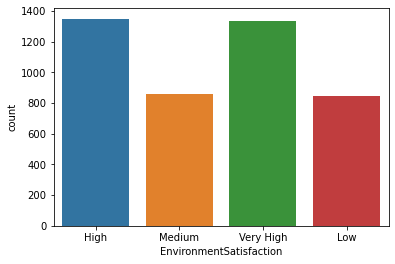

In [43]:
sns.countplot(x='EnvironmentSatisfaction',data=hr);

- With analysis, we found mean & median for EnvironmentSatisfaction field is 2.72 & 3, it needs to be whole number hence, accepted is  3.
- From data_dictionary, we know 3 means High.  

Compute missing values

In [44]:
hr['EnvironmentSatisfaction'] = hr['EnvironmentSatisfaction'].fillna('High')
hr['EnvironmentSatisfaction'].isnull().sum()

0

In [45]:
hr['JobSatisfaction'].value_counts(ascending=False)

Very High    1367
High         1322
Low           860
Medium        840
Name: JobSatisfaction, dtype: int64

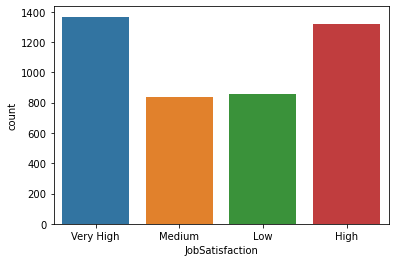

In [46]:
sns.countplot(x='JobSatisfaction',data=hr);

- With analysis, we found mean & median for JobSatisfaction field is 2.72 & 3, it needs to be whole number hence, accepted is  3.
- From data_dictionary, we know 3 means High.

Compute missing values

In [47]:
hr['JobSatisfaction'] = hr['JobSatisfaction'].fillna('High')
hr['JobSatisfaction'].isnull().sum()

0

In [48]:
hr['WorkLifeBalance'].value_counts(ascending=False)

Better    2660
Good      1019
Best       454
Bad        239
Name: WorkLifeBalance, dtype: int64

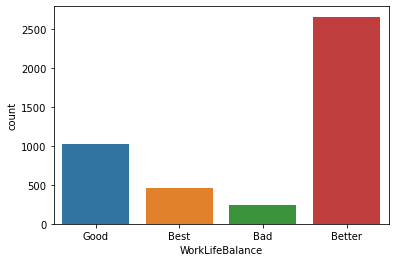

In [49]:
sns.countplot(x='WorkLifeBalance',data=hr);

- With analysis, we found mean & median for WorkLifeBalance field is 2.76 & 3, it needs to be whole number hence, accepted is  3.
- From data_dictionary, we know 3 means Better.

#Compute missing values

In [50]:
hr['WorkLifeBalance'] = hr['WorkLifeBalance'].fillna('Better')
hr['WorkLifeBalance'].isnull().sum()

0

In [51]:
hr['NumCompaniesWorked'].value_counts(ascending=False)

1.0    1558
0.0     585
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

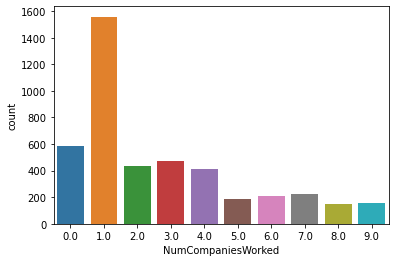

In [52]:
sns.countplot(x='NumCompaniesWorked',data=hr);

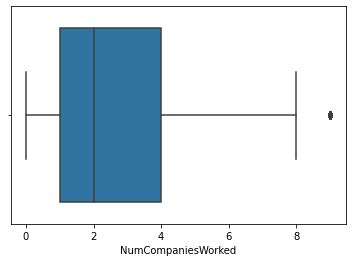

In [53]:
sns.boxplot(x='NumCompaniesWorked',data=hr);

- With analysis, we found mean & median for NumCompaniesWorked field is 2.69 & 2, it needs to be whole number along with handling outliers hence, accepted is  2.


Compute missing values

In [54]:
hr['NumCompaniesWorked'] = hr['NumCompaniesWorked'].fillna(2)
hr['NumCompaniesWorked'].isnull().sum()

0

In [55]:
hr['TotalWorkingYears'].value_counts(ascending=False)

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
2.0      93
14.0     93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
26.0     42
28.0     42
25.0     42
0.0      33
29.0     30
32.0     27
31.0     27
33.0     21
27.0     21
30.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

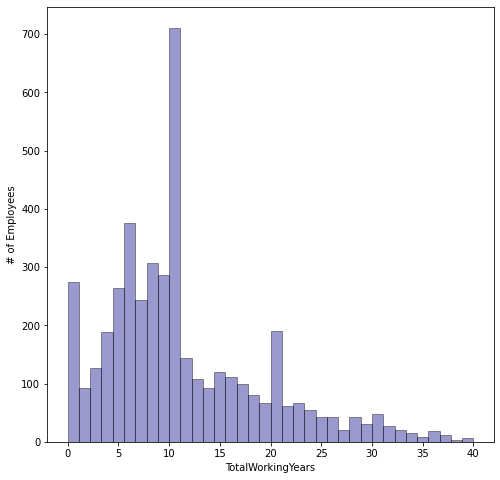

In [56]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hr['TotalWorkingYears'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Employees')
ax.set_xlabel('TotalWorkingYears');


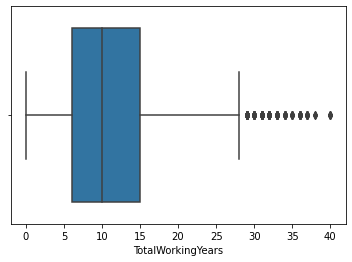

In [57]:
sns.boxplot(x='TotalWorkingYears',data=hr);

- With analysis, we found mean & median for TotalWorkingYears field is 11.27 & 10, it needs to be whole number along with handling outliers hence, accepted is  10.

In [58]:
hr['TotalWorkingYears'] = hr['TotalWorkingYears'].fillna(2)
hr['TotalWorkingYears'].isnull().sum()

0

In [59]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      4409 non-null   float64
 1   JobInvolvement           4409 non-null   object 
 2   PerformanceRating        4409 non-null   object 
 3   EnvironmentSatisfaction  4409 non-null   object 
 4   JobSatisfaction          4409 non-null   object 
 5   WorkLifeBalance          4409 non-null   object 
 6   Age                      4409 non-null   int64  
 7   Attrition                4409 non-null   object 
 8   BusinessTravel           4409 non-null   object 
 9   Department               4409 non-null   object 
 10  DistanceFromHome         4409 non-null   int64  
 11  Education                4409 non-null   object 
 12  EducationField           4409 non-null   object 
 13  Gender                   4409 non-null   object 
 14  JobLevel                

# EDA

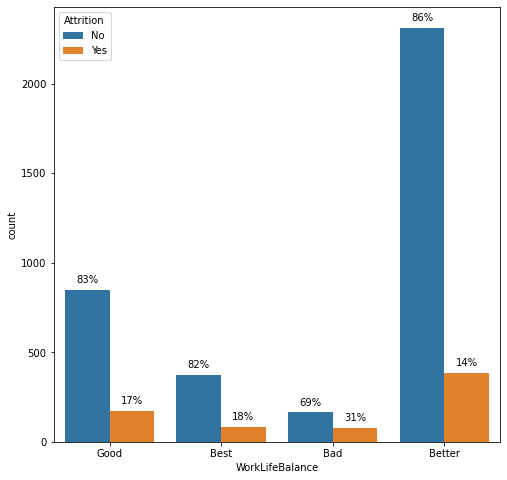

In [60]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance',data=hr,hue="Attrition")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

# Insights
- Attrition : Whether the employee left in the previous year or not
1. Employee who left in the previous year are 17% of population (1019) i.e. 174 who believe WorkLifeBalance is Good in org.
2. Employee who left in the previous year are 18% of population(454) i.e. 81 who believe WorkLifeBalance is Best in org.
3. Employee who left in the previous year are 34% of population (239) i.e. 81 who believe WorkLifeBalance is Bad in org.
4. Employee who left in the previous year are 14% of population (2698) i.e. 378 who believe WorkLifeBalance is Better in org.
- People who left in the previous year & believe WorkLifeBalance is Better in org were 52% of population who left in the previous year, second by 24% people who left in the previous year & believe WorkLifeBalance is Good in org

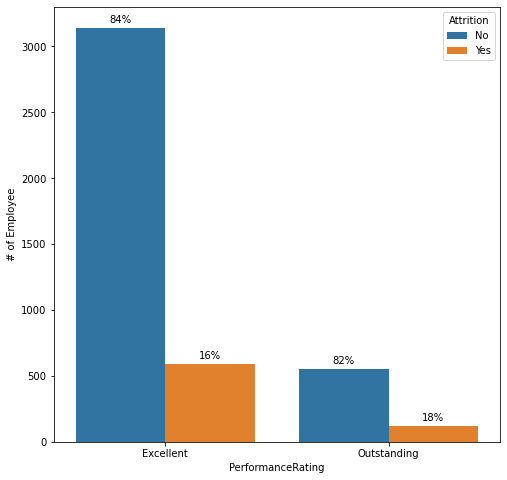

In [61]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='PerformanceRating', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

# Insights
- Attrition : Whether the employee left in the previous year or not
1. Employee who left in the previous year are 16% of population (3732) i.e. 597 whose PerformanceRating was Excellent in org.
2.  Employee who left in the previous year are 18% of population (678) i.e. 122 whose PerformanceRating was Outstanding in org.
- People who left in the previous year & PerformanceRating was Excellent in org were 83% of population who left in the previous year.

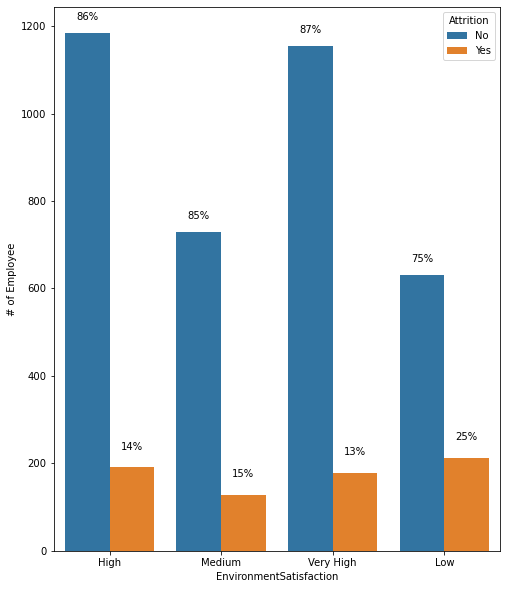

In [62]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x='EnvironmentSatisfaction', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

# Insights
- Attrition : Whether the employee left in the previous year or not
1. Employee who left in the previous year are 14% of population (1375) i.e. 192 who believe EnvironmentSatisfaction is High in org. in org.
1. Employee who left in the previous year are 15% of population (856) i.e. 129 who believe EnvironmentSatisfaction is Medium in org. 
1. Employee who left in the previous year are 13% of population (1334) i.e. 173 who believe EnvironmentSatisfaction is Very High in org.
1. Employee who left in the previous year are 25% of population (845) i.e. 211 who believe EnvironmentSatisfaction is Low in org. 
- People who left in the previous year & believe EnvironmentSatisfaction is Low in org were 30% of population who left in the previous year. Second by People who left in the previous year & believe EnvironmentSatisfaction is High in org

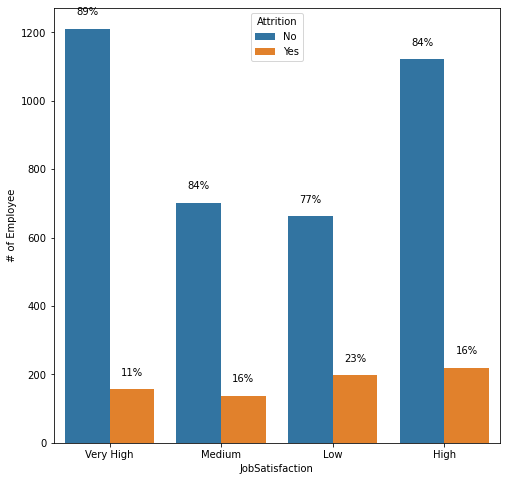

In [63]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobSatisfaction', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

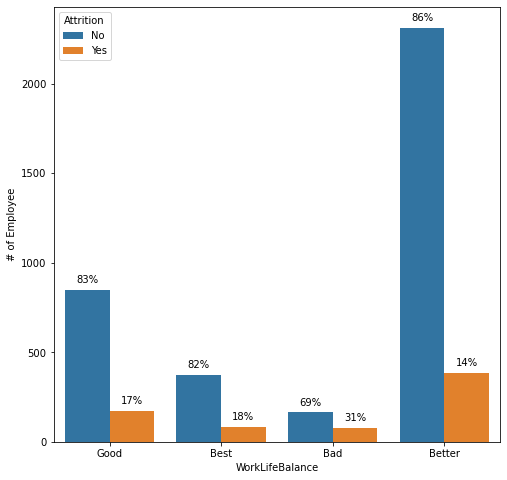

In [64]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

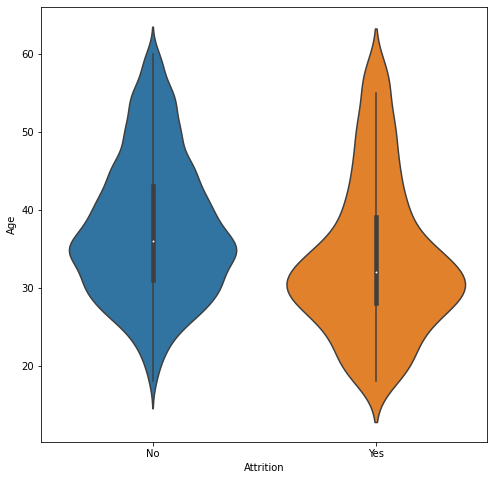

In [65]:
plt.figure(figsize=(8,8))
sns.violinplot(y='Age',x='Attrition',data=hr)
plt.show()

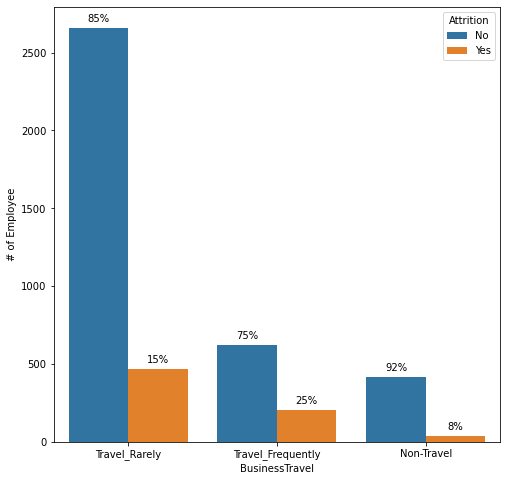

In [66]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='BusinessTravel', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

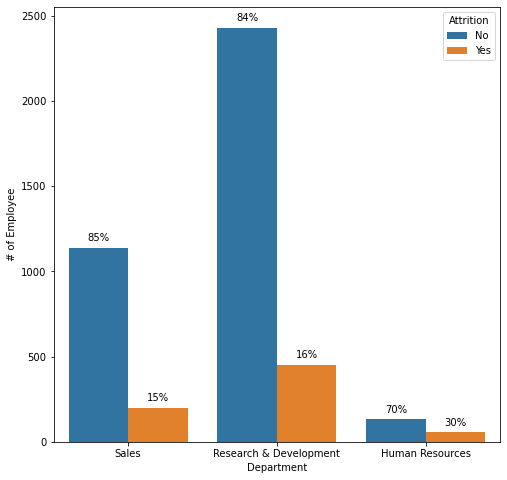

In [67]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Department', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

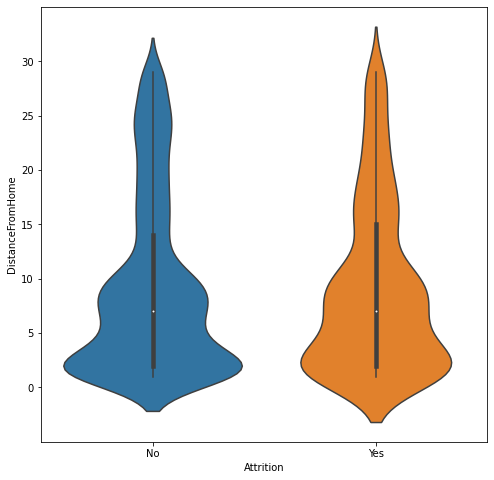

In [68]:
plt.figure(figsize=(8,8))
sns.violinplot(y='DistanceFromHome',x='Attrition',data=hr)

plt.show()

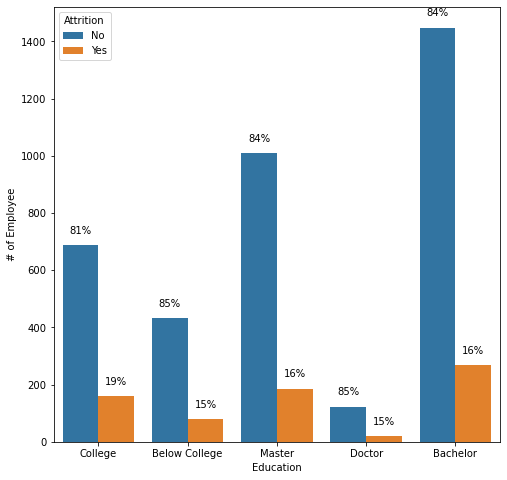

In [69]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Education', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

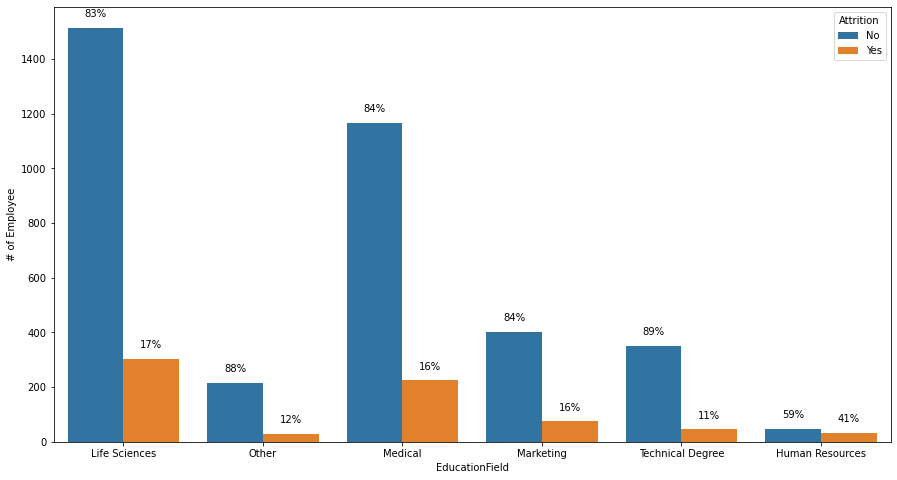

In [70]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='EducationField', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

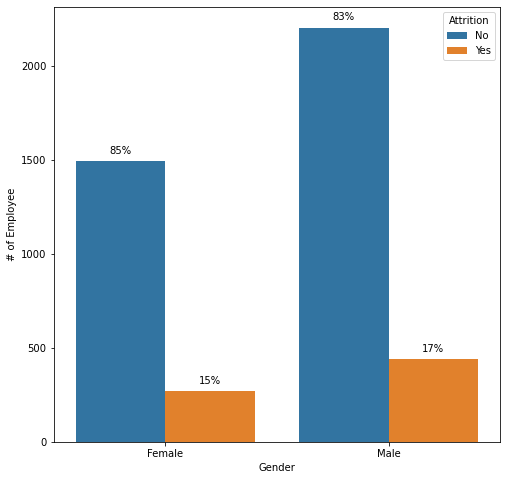

In [71]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Gender', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

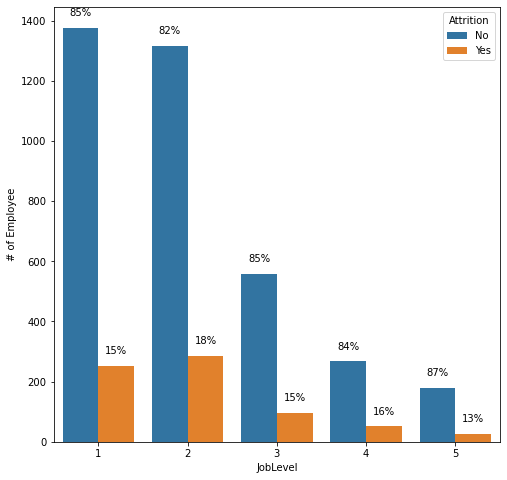

In [72]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobLevel', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

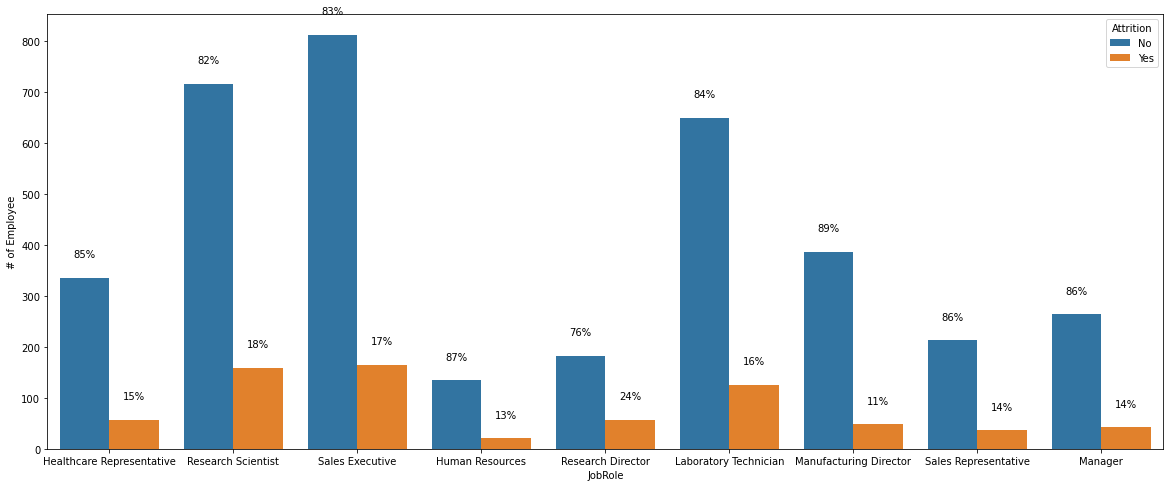

In [73]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='JobRole', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

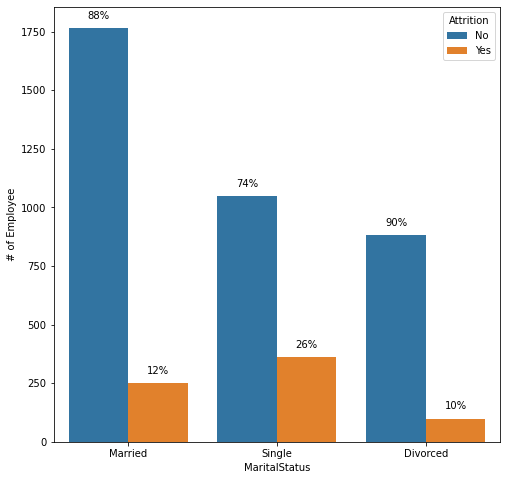

In [74]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='MaritalStatus', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

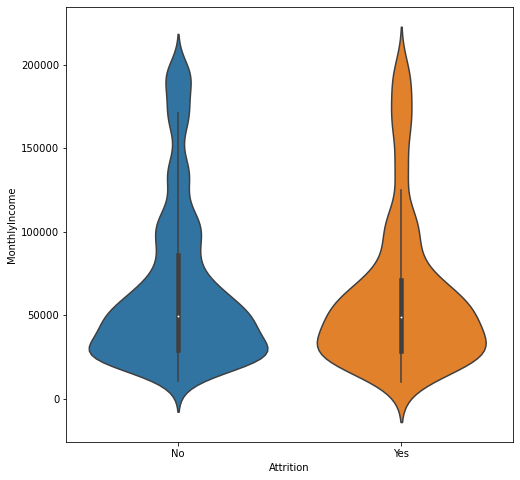

In [75]:
plt.figure(figsize=(8,8))
sns.violinplot(y='MonthlyIncome',x='Attrition',data=hr)

plt.show()

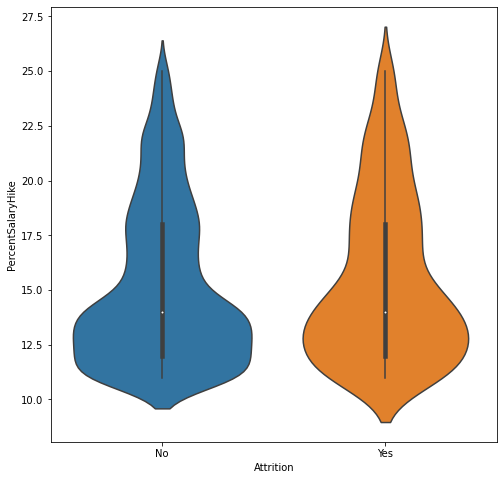

In [76]:
plt.figure(figsize=(8,8))
sns.violinplot(y='PercentSalaryHike',x='Attrition',data=hr)

plt.show()

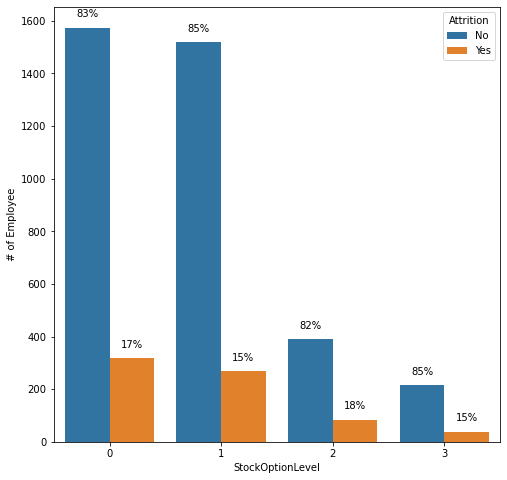

In [77]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='StockOptionLevel', data=hr, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

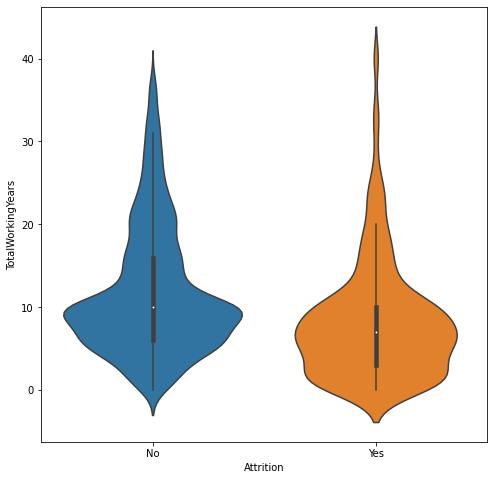

In [78]:

plt.figure(figsize=(8,8))
sns.violinplot(y='TotalWorkingYears',x='Attrition',data=hr)

plt.show()

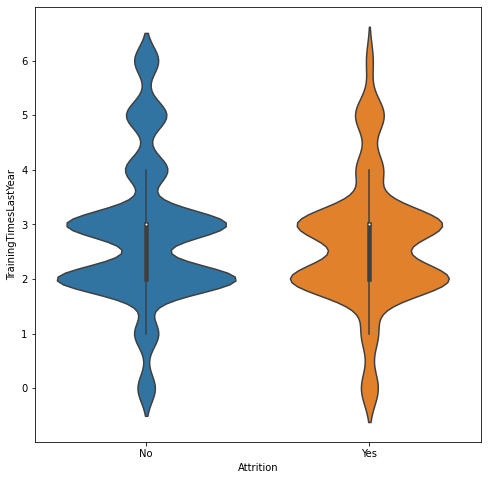

In [79]:
plt.figure(figsize=(8,8))
sns.violinplot(y='TrainingTimesLastYear',x='Attrition',data=hr)

plt.show()

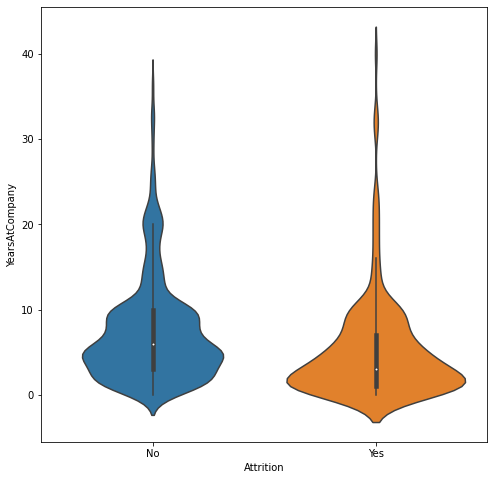

In [80]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsAtCompany',x='Attrition',data=hr)

plt.show()

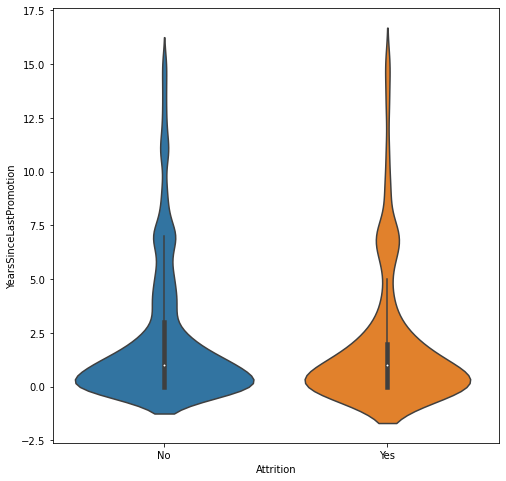

In [81]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsSinceLastPromotion',x='Attrition',data=hr)

plt.show()

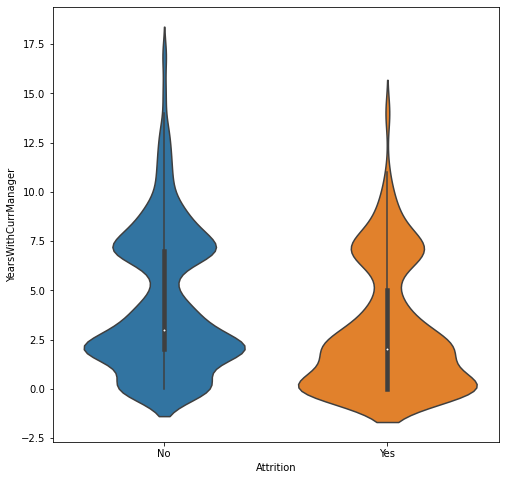

In [82]:
plt.figure(figsize=(8,8))
sns.violinplot(y='YearsWithCurrManager',x='Attrition',data=hr)

plt.show()

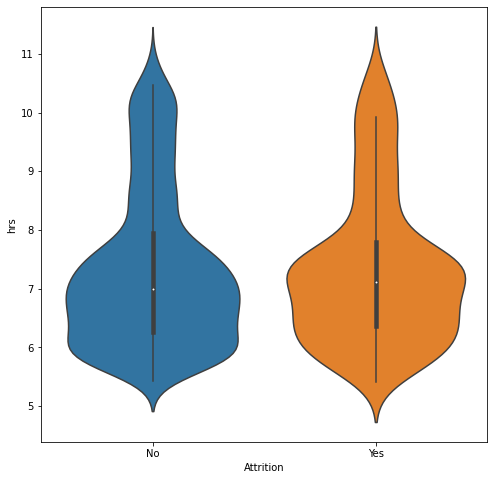

In [83]:
plt.figure(figsize=(8,8))
sns.violinplot(y='hrs',x='Attrition',data=hr)

plt.show()

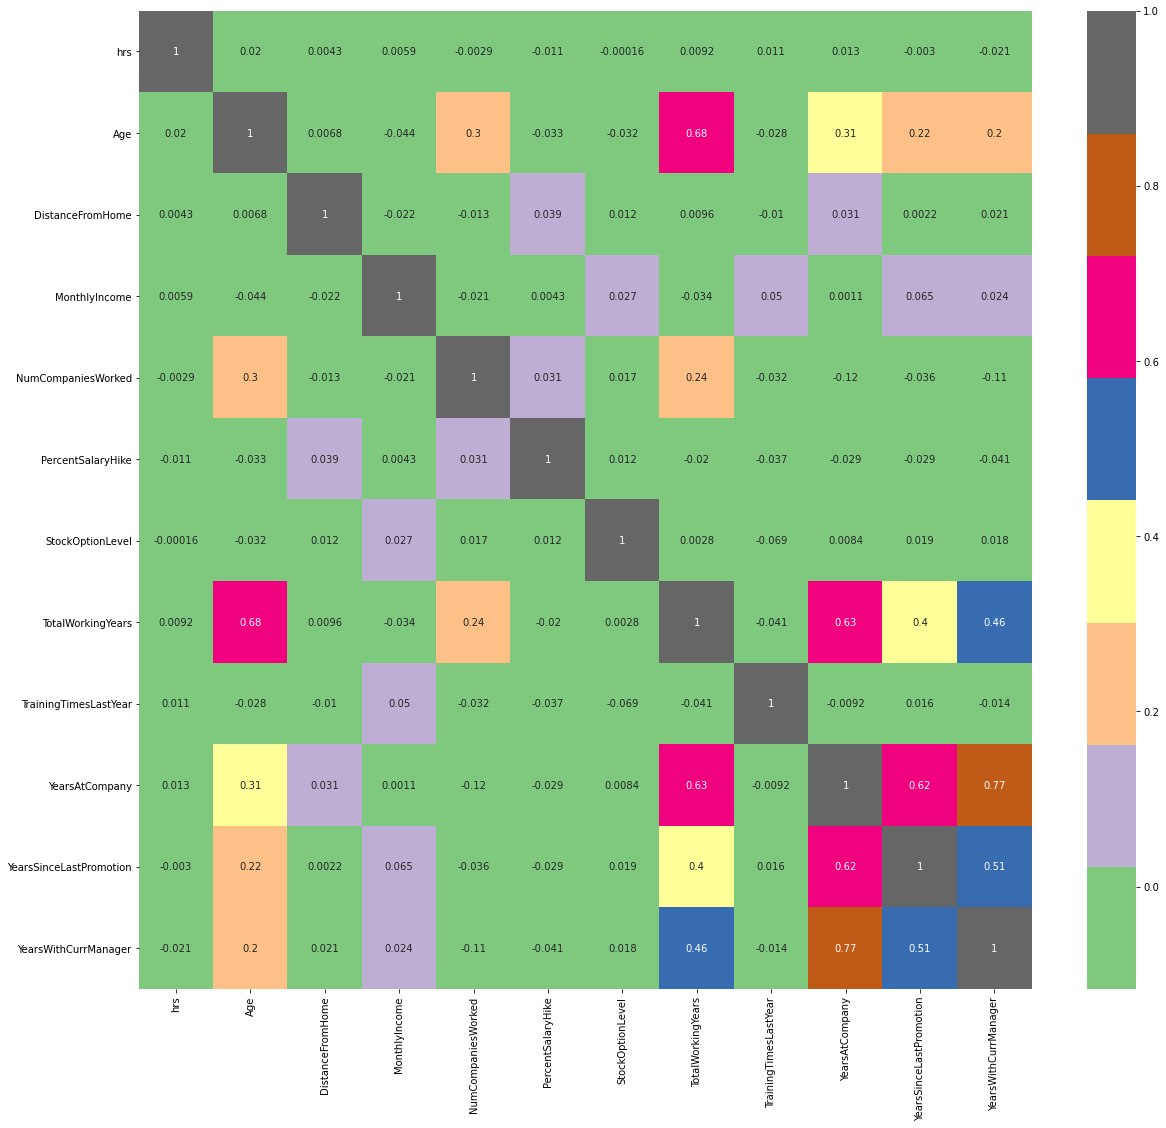

In [84]:
plt.figure(figsize=(20,18))
sns.heatmap(hr.corr(), annot = True, cmap="Accent");

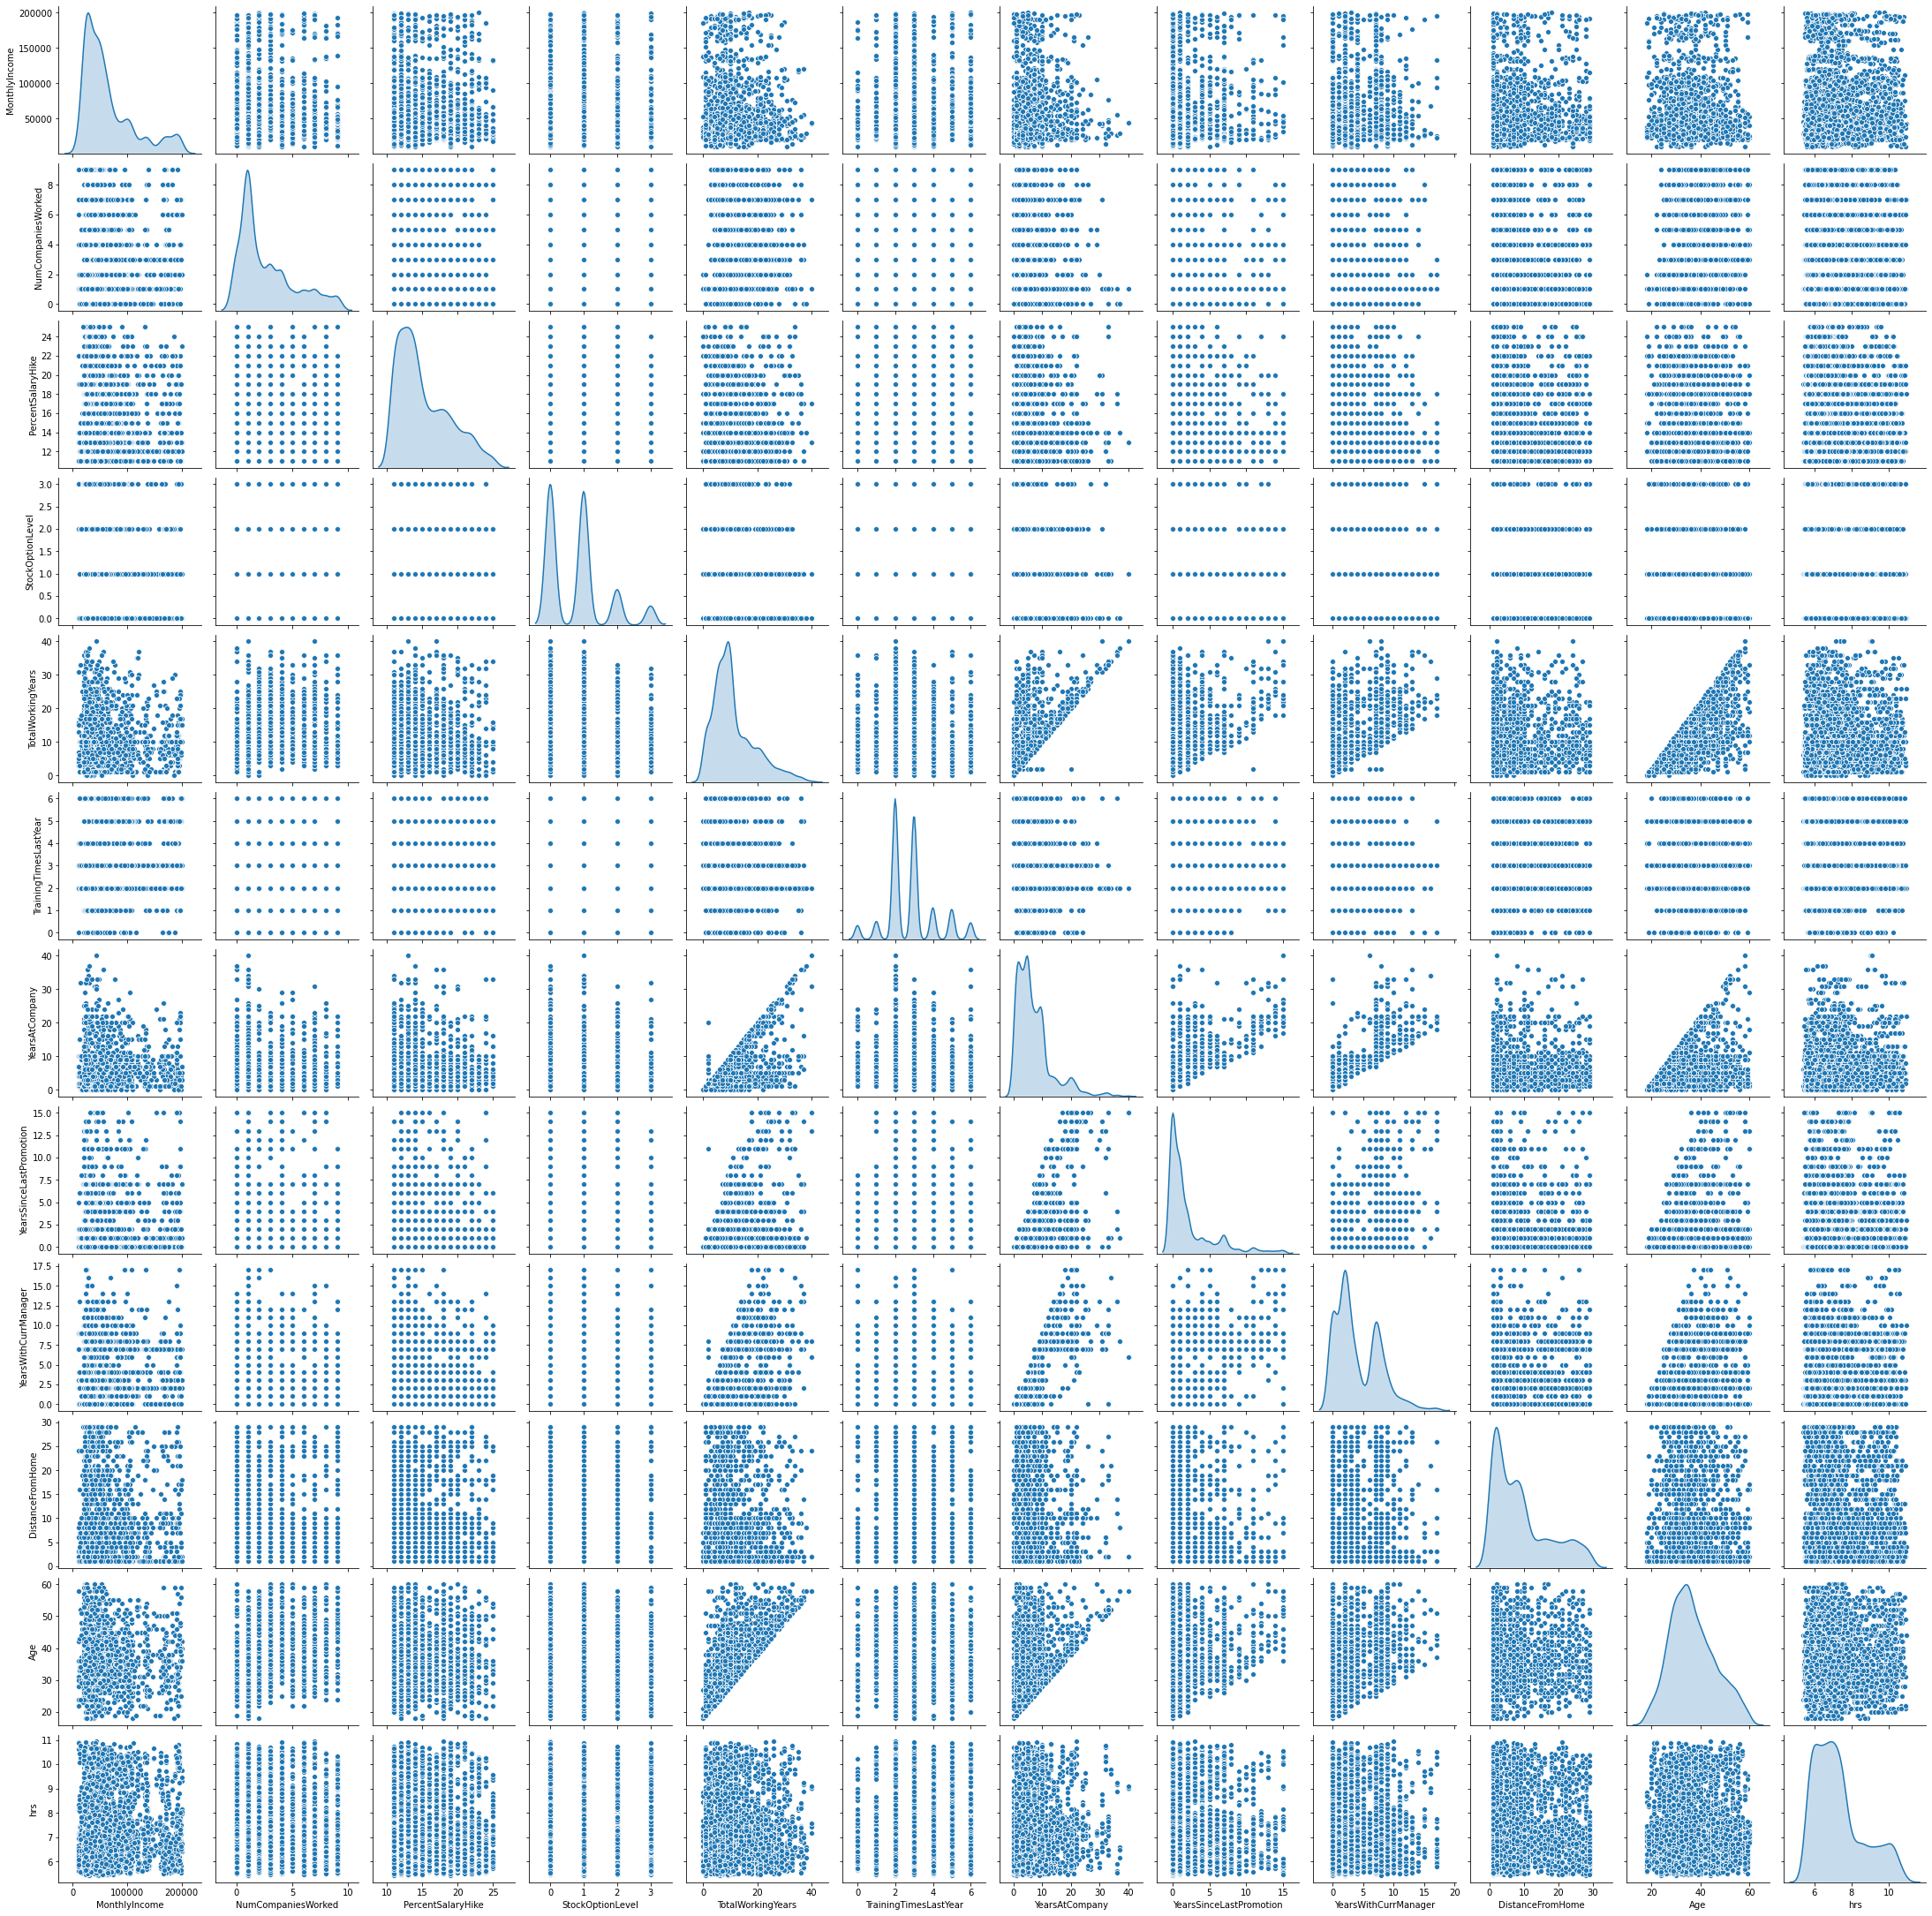

In [85]:
hr_num=hr[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']]

sns.pairplot(hr_num, diag_kind='kde')
plt.show()

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [86]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      4409 non-null   float64
 1   JobInvolvement           4409 non-null   object 
 2   PerformanceRating        4409 non-null   object 
 3   EnvironmentSatisfaction  4409 non-null   object 
 4   JobSatisfaction          4409 non-null   object 
 5   WorkLifeBalance          4409 non-null   object 
 6   Age                      4409 non-null   int64  
 7   Attrition                4409 non-null   object 
 8   BusinessTravel           4409 non-null   object 
 9   Department               4409 non-null   object 
 10  DistanceFromHome         4409 non-null   int64  
 11  Education                4409 non-null   object 
 12  EducationField           4409 non-null   object 
 13  Gender                   4409 non-null   object 
 14  JobLevel                

In [87]:
hr.columns

Index(['hrs', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Age', 'Attrition',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [88]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(hr[['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
                                 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
                                 'MaritalStatus']], drop_first=True)

# Adding the results to the master dataframe
hr = pd.concat([hr, dummy1], axis=1)

In [89]:
hr.head()

hrs JobInvolvement PerformanceRating EnvironmentSatisfaction  \
0   7.315971           High         Excellent                    High   
1   6.816081         Medium       Outstanding                    High   
2   6.789215           High         Excellent                  Medium   
3   7.877561         Medium         Excellent               Very High   
4  10.275802           High         Excellent               Very High   

  JobSatisfaction WorkLifeBalance  Age Attrition     BusinessTravel  \
0       Very High            Good   51        No      Travel_Rarely   
1          Medium            Best   31       Yes  Travel_Frequently   
2          Medium             Bad   32        No  Travel_Frequently   
3       Very High          Better   38        No         Non-Travel   
4             Low          Better   32        No      Travel_Rarely   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 6        College  Life Sciences   
1  Research & Development                10  Below College  Life Sciences   
2  Research & Development                17         Master          Other   
3  Research & Development                 2         Doctor  Life Sciences   
4  Research & Development                10  Below College        Medical   

   Gender JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0  Female        1  Healthcare Representative       Married         131160   
1  Female        1         Research Scientist        Single          41890   
2    Male        4            Sales Executive       Married         193280   
3    Male        3            Human Resources       Married          83210   
4    Male        1            Sales Executive        Single          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
0                     0                   0                      0   
1                     4                   0                      1   
2                     3                   0                      0   
3                     5                   0                      1   
4                     4                   0                      0   

   JobInvolvement_Very High  PerformanceRating_Outstanding  \
0                         0                              0   
1                         0                              1   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
0                            0                               0   
1                            0                               0   
2                            0                               1   
3                            0                               0   
4                            0                               0   

   EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
0                                  0                    0

In [90]:
hr.shape

(4409, 67)

# Dropping the repeated variables

In [91]:
# We have created dummies for the below variables, so we can drop them
hr = hr.drop(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                                 'JobSatisfaction', 'WorkLifeBalance','BusinessTravel', 'Department',
                                 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole',
                                 'MaritalStatus'], 1)

In [92]:
hr.head()

hrs  Age Attrition  DistanceFromHome  MonthlyIncome  \
0   7.315971   51        No                 6         131160   
1   6.816081   31       Yes                10          41890   
2   6.789215   32        No                17         193280   
3   7.877561   38        No                 2          83210   
4  10.275802   32        No                10          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
0                     0                   0                      0   
1                     4                   0                      1   
2                     3                   0                      0   
3                     5                   0                      1   
4                     4                   0                      0   

   JobInvolvement_Very High  PerformanceRating_Outstanding  \
0                         0                              0   
1                         0                              1   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
0                            0                               0   
1                            0                               0   
2                            0                               1   
3                            0                               0   
4                            0                               0   

   EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  1                    0   
4                                  1                    1   

   JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
0                       0                          1                     0   
1                       1                          0                     1   
2                       1                          0                     0   
3                       0                          1                     0   
4                       0                          0                     0   

   WorkLifeBalance_Better  WorkLifeBalance_Good  \
0                       0                     1   
1                       0                     0   
2                       0                     0   
3                       1                     0   
4                       1                     0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0        

In [93]:
hr.shape

(4409, 54)

# Mapping Attrition to 1/0 

In [94]:
hr['Attrition'] = hr['Attrition'].replace({'Yes': 1, "No": 0})

In [95]:
hr.head()

hrs  Age  Attrition  DistanceFromHome  MonthlyIncome  \
0   7.315971   51          0                 6         131160   
1   6.816081   31          1                10          41890   
2   6.789215   32          0                17         193280   
3   7.877561   38          0                 2          83210   
4  10.275802   32          0                10          23420   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 1.0                 11                 0                1.0   
1                 0.0                 23                 1                6.0   
2                 1.0                 15                 3                5.0   
3                 3.0                 11                 3               13.0   
4                 4.0                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
0                     0                   0                      0   
1                     4                   0                      1   
2                     3                   0                      0   
3                     5                   0                      1   
4                     4                   0                      0   

   JobInvolvement_Very High  PerformanceRating_Outstanding  \
0                         0                              0   
1                         0                              1   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
0                            0                               0   
1                            0                               0   
2                            0                               1   
3                            0                               0   
4                            0                               0   

   EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  1                    0   
4                                  1                    1   

   JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
0                       0                          1                     0   
1                       1                          0                     1   
2                       1                          0                     0   
3                       0                          1                     0   
4                       0                          0                     0   

   WorkLifeBalance_Better  WorkLifeBalance_Good  \
0                       0                     1   
1                       0                     0   
2                       0                     0   
3                       1                     0   
4                       1                     0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0  

In [96]:
hr.shape

(4409, 54)

 # Step 3: Test-Train Split

In [97]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = hr.drop(['Attrition'], axis=1)

X.head()

hrs  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0   7.315971   51                 6         131160                 1.0   
1   6.816081   31                10          41890                 0.0   
2   6.789215   32                17         193280                 1.0   
3   7.877561   38                 2          83210                 3.0   
4  10.275802   32                10          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
0                     0                   0                      0   
1                     4                   0                      1   
2                     3                   0                      0   
3                     5                   0                      1   
4                     4                   0                      0   

   JobInvolvement_Very High  PerformanceRating_Outstanding  \
0                         0                              0   
1                         0                              1   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
0                            0                               0   
1                            0                               0   
2                            0                               1   
3                            0                               0   
4                            0                               0   

   EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  1                    0   
4                                  1                    1   

   JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
0                       0                          1                     0   
1                       1                          0                     1   
2                       1                          0                     0   
3                       0                          1                     0   
4                       0                          0                     0   

   WorkLifeBalance_Better  WorkLifeBalance_Good  \
0                       0                     1   
1                       0                     0   
2                       0                     0   
3                       1                     0   
4                       1                     0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Research & Developm

In [98]:
X.shape

(4409, 53)

In [99]:
# Putting response variable to y
y = hr['Attrition']

y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [100]:
y.shape

(4409,)

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [102]:
X_train.head()

hrs  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
537   10.506000   37                 7          71430                 2.0   
1881   7.049634   39                10          66960                 7.0   
2367   7.044587   39                 2          72640                 0.0   
3618   7.767506   45                19          36810                 3.0   
1398   5.761795   40                11          70050                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
537                  21                 0                8.0   
1881                 11                 0                8.0   
2367                 17                 0                2.0   
3618                 17                 1               22.0   
1398                 20                 2               21.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
537                       6               1                        0   
1881                      3               2                        2   
2367                      5              10                        0   
3618                      2               0                        0   
1398                      2              20                        9   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
537                      0                   0                      1   
1881                     2                   0                      0   
2367                     7                   0                      0   
3618                     0                   0                      0   
1398                     9                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
537                             0                               0   
1881                            0                               0   
2367                            0                               0   
3618                            0                               1   
1398                            0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
537                                   1                    0   
1881                                  1                    1   
2367                                  0                    0   
3618                                  0                    0   
1398                                  1                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
537                        0                          1                     0   
1881                       0                          0                     0   
2367                       0                          0                     0   
3618                       1                          0                     0   
1398                       0                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
537                        1                     0   
1881                       0                     0   
2367                       1                     0   
3618                       1                     0   
1398                       1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
537                                  0                             1   
1881                                 0                             1   
2367                                 0                             1   
3

In [103]:
X_train.shape

(3086, 53)

In [104]:
 X_test.head()

hrs  Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
4019  7.284448   28                29          68520                 1.0   
1697  8.694279   27                22          22060                 0.0   
2481  7.054228   43                16          67820                 0.0   
1039  7.839795   26                 2          65780                 0.0   
93    6.847280   32                 2          57470                 1.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
4019                 18                 1                1.0   
1697                 14                 1                6.0   
2481                 16                 1               10.0   
1039                 15                 2                6.0   
93                   13                 0                8.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
4019                      2               1                        0   
1697                      4               5                        0   
2481                      2               9                        1   
1039                      3               5                        1   
93                        0               8                        0   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
4019                     0                   0                      0   
1697                     3                   0                      0   
2481                     8                   0                      0   
1039                     4                   0                      1   
93                       7                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
4019                         1                              0   
1697                         0                              0   
2481                         0                              0   
1039                         0                              0   
93                           0                              0   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
4019                            0                               1   
1697                            1                               0   
2481                            0                               1   
1039                            0                               0   
93                              0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
4019                                  0                    0   
1697                                  0                    0   
2481                                  0                    0   
1039                                  1                    0   
93                                    0                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
4019                       1                          0                     0   
1697                       0                          0                     0   
2481                       0                          1                     0   
1039                       1                          0                     0   
93                         1                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
4019                       1                     0   
1697                       0                     1   
2481                       1                     0   
1039                       1                     0   
93                         1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
4019                                 0                             1   
1697                                 0                             1   
2481                                 0                             1   
1039  

In [105]:
 X_test.shape

(1323, 53)

In [106]:
y_train.head()

537     0
1881    1
2367    0
3618    0
1398    0
Name: Attrition, dtype: int64

In [107]:
y_train.shape

(3086,)

In [108]:
y_test.head()

4019    0
1697    0
2481    0
1039    1
93      0
Name: Attrition, dtype: int64

In [109]:
y_test.shape

(1323,)

# Step 5: Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']] = scaler.fit_transform(X_train[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']])

X_train.head()

hrs       Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
537   2.429327  0.020339         -0.282194       0.141772           -0.278151   
1881 -0.175435  0.239422          0.088223       0.046708            1.737760   
2367 -0.179239  0.239422         -0.899556       0.167505           -1.084516   
3618  0.365562  0.896672          1.199474      -0.594493            0.125031   
1398 -1.145968  0.348964          0.211695       0.112423           -0.681334   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
537            1.579773         -0.935020          -0.413179   
1881          -1.160323         -0.935020          -0.413179   
2367           0.483734         -0.935020          -1.188690   
3618           0.483734          0.237936           1.396347   
1398           1.305763          1.410893           1.267095   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
537                2.498059       -0.985765                -0.689611   
1881               0.154895       -0.820174                -0.065889   
2367               1.717004        0.504553                -0.689611   
3618              -0.626160       -1.151356                -0.689611   
1398              -0.626160        2.160462                 2.117139   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
537              -1.157795                   0                      1   
1881             -0.597068                   0                      0   
2367              0.804751                   0                      0   
3618             -1.157795                   0                      0   
1398              1.365479                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
537                             0                               0   
1881                            0                               0   
2367                            0                               0   
3618                            0                               1   
1398                            0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
537                                   1                    0   
1881                                  1                    1   
2367                                  0                    0   
3618                                  0                    0   
1398                                  1                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
537                        0                          1                     0   
1881                       0                          0                     0   
2367                       0                          0                     0   
3618                       1                          0                     0   
1398                       0                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
537                        1                     0   
1881                       0                     0   
2367                       1                     0   
3618                       1                     0   
1398                       1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
537                                  0                             1   
1881                                 0                             1   
2367                                 0          

In [111]:
X_test[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']] = scaler.transform(X_test[[ 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'DistanceFromHome','Age','hrs']])

X_test.head()

hrs       Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
4019  0.001523 -0.965535          2.434197       0.079884           -0.681334   
1697  1.063991 -1.075076          1.569891      -0.908182           -1.084516   
2481 -0.171973  0.677589          0.829057       0.064998           -1.084516   
1039  0.420040 -1.184618         -0.899556       0.021613           -1.084516   
93   -0.327932 -0.527368         -0.899556      -0.155116           -0.681334   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
4019           0.757744          0.237936          -1.317942   
1697          -0.338294          0.237936          -0.671682   
2481           0.209725          0.237936          -0.154675   
1039          -0.064285          1.410893          -0.671682   
93            -0.612304         -0.935020          -0.413179   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
4019              -0.626160       -0.985765                -0.689611   
1697               0.935950       -0.323401                -0.689611   
2481              -0.626160        0.338962                -0.377750   
1039               0.154895       -0.323401                -0.377750   
93                -2.188269        0.173371                -0.689611   

      YearsWithCurrManager  JobInvolvement_Low  JobInvolvement_Medium  \
4019             -1.157795                   0                      0   
1697             -0.316704                   0                      0   
2481              1.085115                   0                      0   
1039             -0.036340                   0                      1   
93                0.804751                   0                      0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
4019                         1                              0   
1697                         0                              0   
2481                         0                              0   
1039                         0                              0   
93                           0                              0   

      EnvironmentSatisfaction_Low  EnvironmentSatisfaction_Medium  \
4019                            0                               1   
1697                            1                               0   
2481                            0                               1   
1039                            0                               0   
93                              0                               0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Low  \
4019                                  0                    0   
1697                                  0                    0   
2481                                  0                    0   
1039                                  1                    0   
93                                    0                    0   

      JobSatisfaction_Medium  JobSatisfaction_Very High  WorkLifeBalance_Best  \
4019                       1                          0                     0   
1697                       0                          0                     0   
2481                       0                          1                     0   
1039                       1                          0                     0   
93                         1                          0                     0   

      WorkLifeBalance_Better  WorkLifeBalance_Good  \
4019                       1                     0   
1697                       0                     1   
2481                       1                     0   
1039                       1                     0   
93                         1                     0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
4019                                 0                             1   
1697                                 0                             1   
2481                                 0          

In [112]:
### Checking the Attrition Rate
Attrition = (sum(hr['Attrition'])/len(hr['Attrition'].index))*100
Attrition

16.126105692900886

We have almost 16.13% Attrition rate

# Step 6: Looking at Correlations

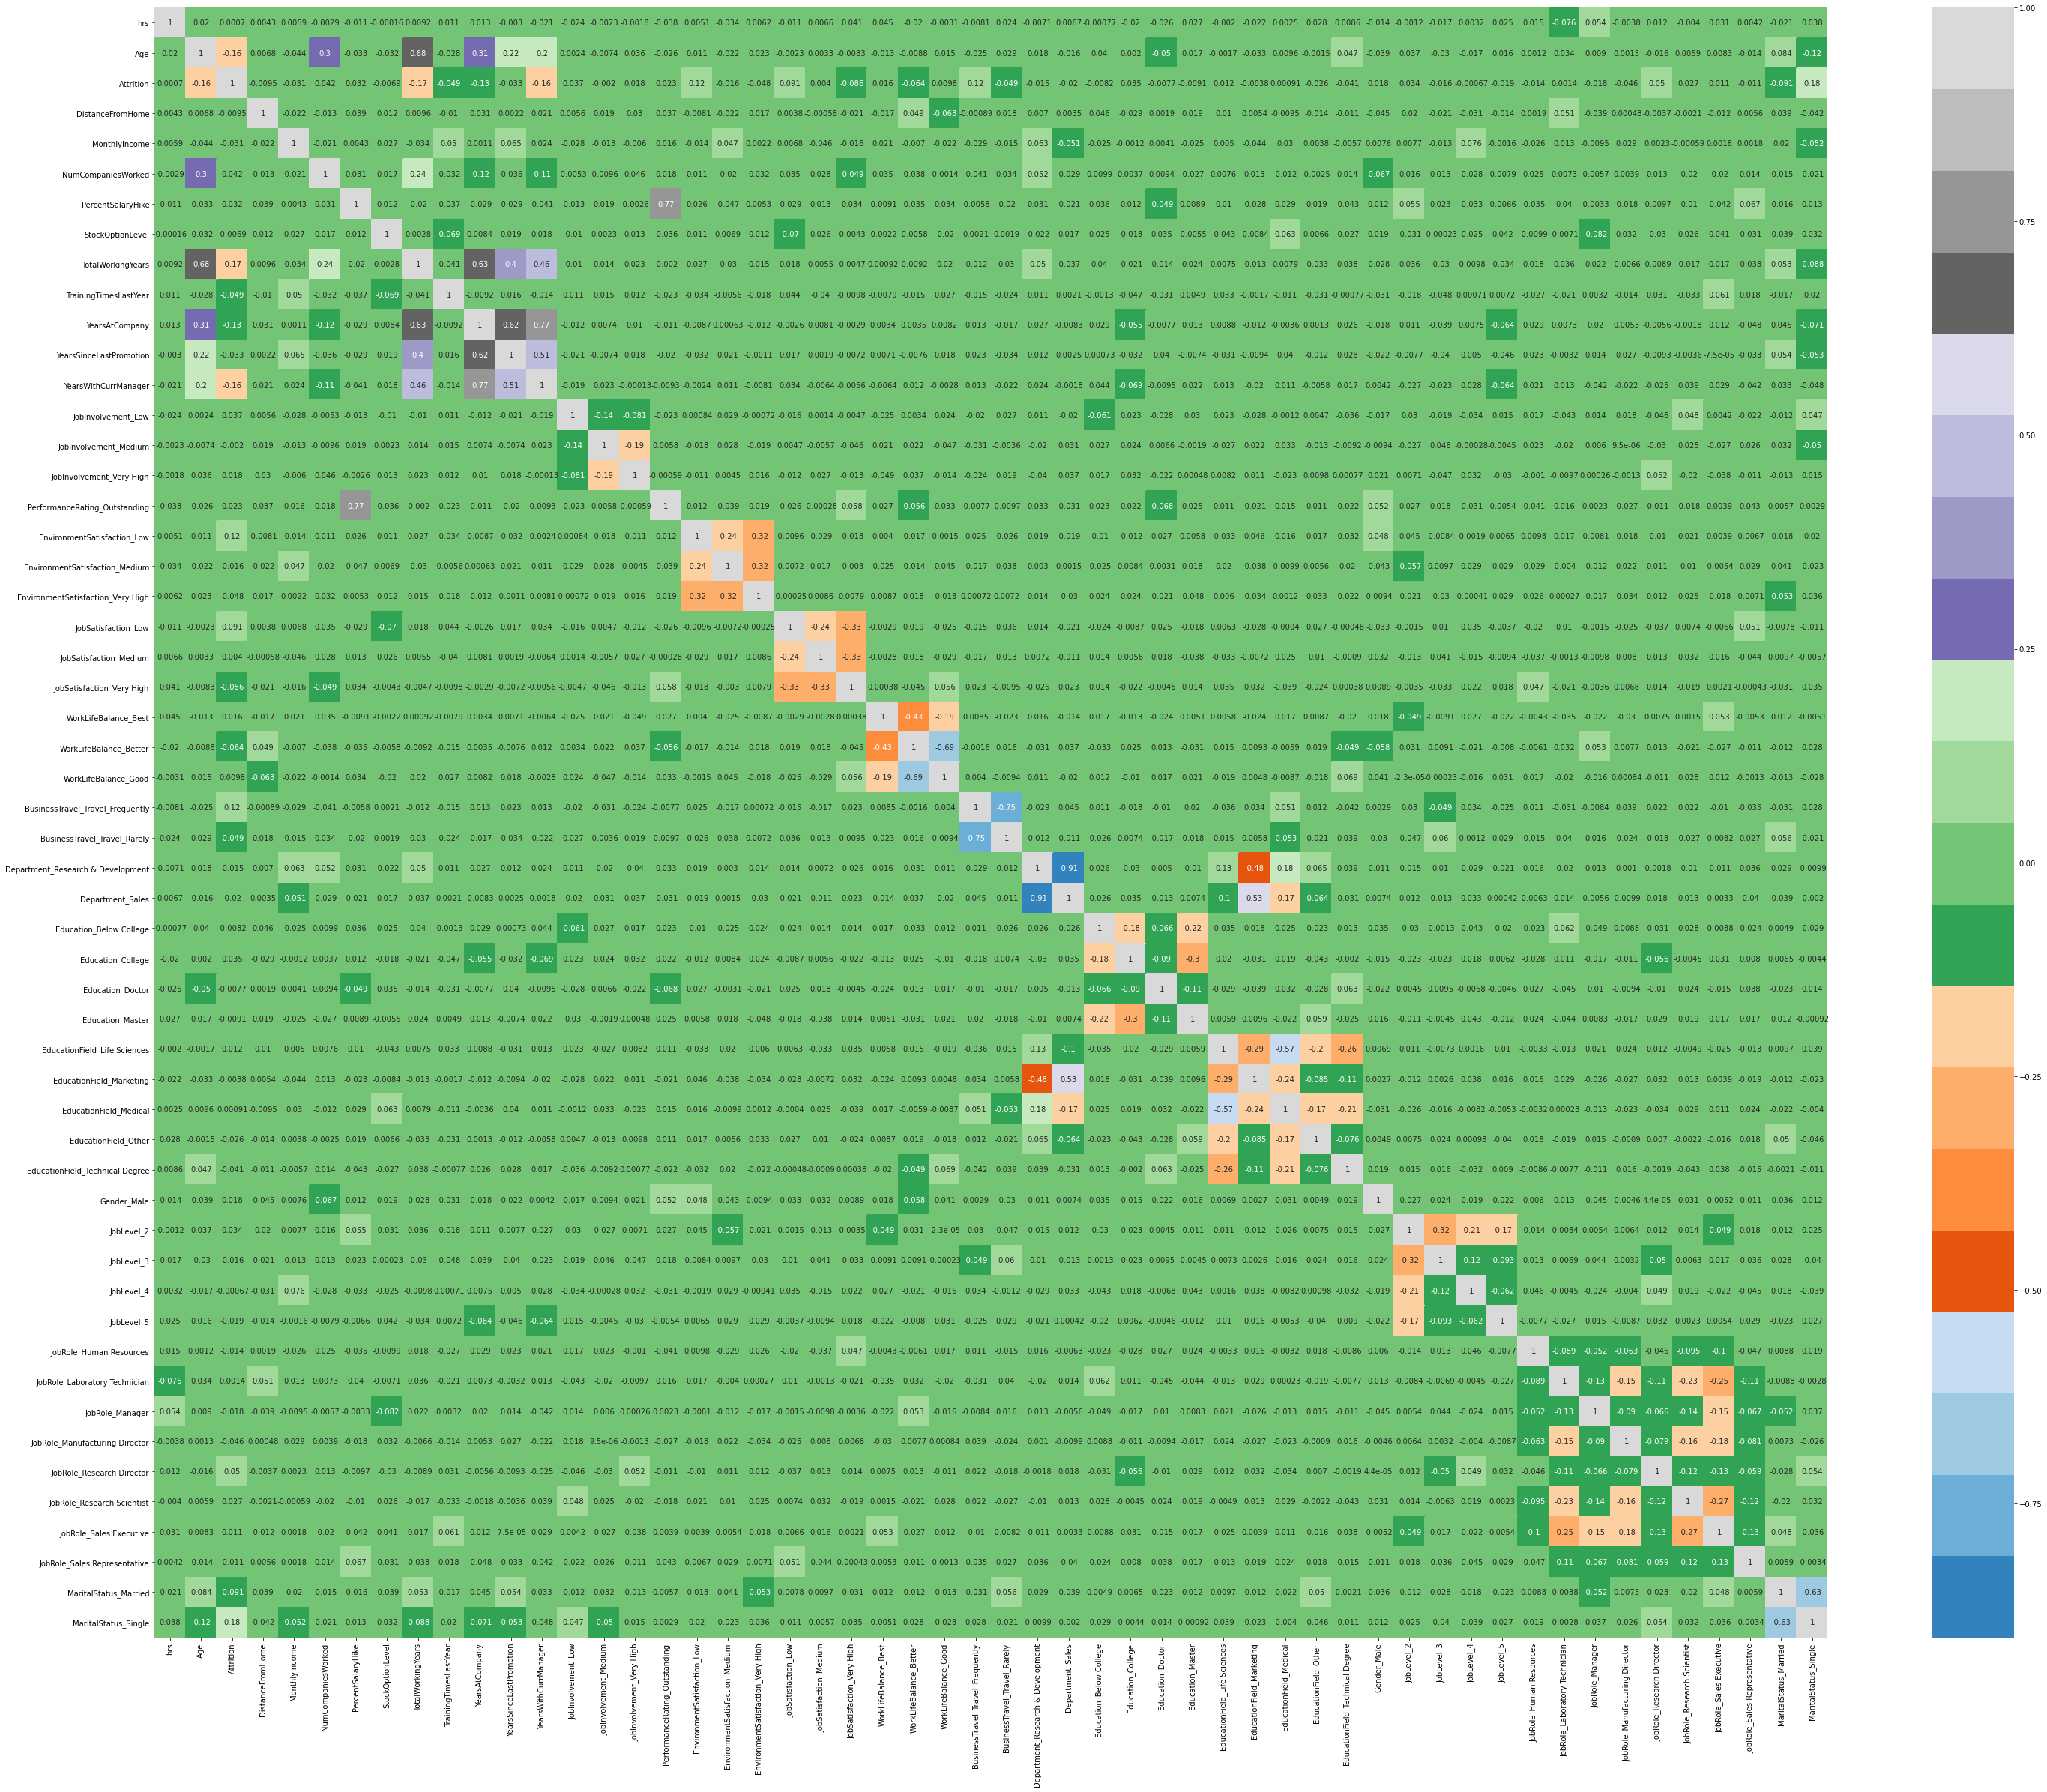

In [113]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))   
sns.heatmap(hr.corr(),annot = True,cmap="tab20c")
plt.show()

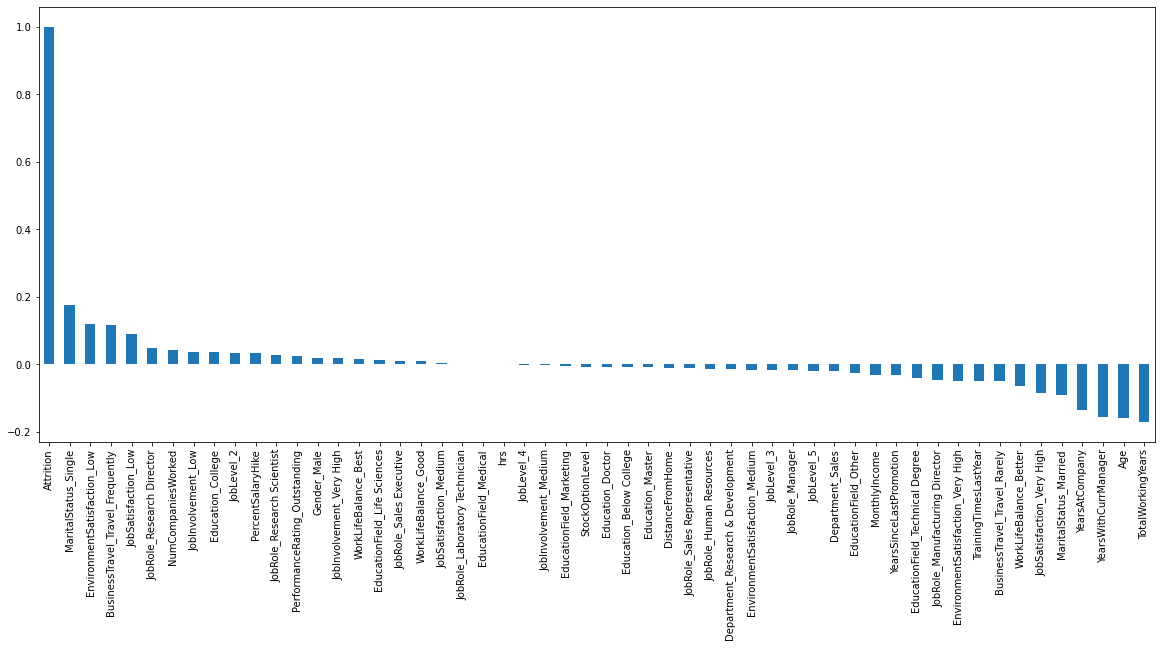

In [114]:
plt.figure(figsize=(20,8))
hr.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

Dropping highly correlated dummy variables

In [115]:
corrmat = X_train.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
matrix= corrdf.sort_values(by = 'Correlation', ascending = False).head(50)
matrix

Var1                               Var2  \
1511                   Department_Sales  Department_Research & Development   
592                YearsWithCurrManager                     YearsAtCompany   
800       PerformanceRating_Outstanding                  PercentSalaryHike   
1403       BusinessTravel_Travel_Rarely   BusinessTravel_Travel_Frequently   
1295               WorkLifeBalance_Good             WorkLifeBalance_Better   
372                   TotalWorkingYears                                Age   
2807               MaritalStatus_Single              MaritalStatus_Married   
484                      YearsAtCompany                  TotalWorkingYears   
539             YearsSinceLastPromotion                     YearsAtCompany   
1888             EducationField_Medical       EducationField_Life Sciences   
1830           EducationField_Marketing                   Department_Sales   
593                YearsWithCurrManager            YearsSinceLastPromotion   
1829           EducationField_Marketing  Department_Research & Development   
590                YearsWithCurrManager                  TotalWorkingYears   
1241             WorkLifeBalance_Better               WorkLifeBalance_Best   
537             YearsSinceLastPromotion                  TotalWorkingYears   
1133          JobSatisfaction_Very High             JobSatisfaction_Medium   
1132          JobSatisfaction_Very High                JobSatisfaction_Low   
2159                         JobLevel_3                         JobLevel_2   
971   EnvironmentSatisfaction_Very High     EnvironmentSatisfaction_Medium   
970   EnvironmentSatisfaction_Very High        EnvironmentSatisfaction_Low   
478                      YearsAtCompany                                Age   
213                  NumCompaniesWorked                                Age   
1726                   Education_Master                  Education_College   
1835           EducationField_Marketing       EducationField_Life Sciences   
2645            JobRole_Sales Executive         JobRole_Research Scientist   
1994    EducationField_Technical Degree       EducationField_Life Sciences   
1079             JobSatisfaction_Medium                JobSatisfaction_Low   
2641            JobRole_Sales Executive      JobRole_Laboratory Technician   
1889             EducationField_Medical           EducationField_Marketing   
375                   TotalWorkingYears                 NumCompaniesWorked   
917      EnvironmentSatisfaction_Medium        EnvironmentSatisfaction_Low   
2588         JobRole_Research Scientist      JobRole_Laboratory Technician   
1725                   Education_Master            Education_Below College   
1996    EducationField_Technical Degree             EducationField_Medical   
2212                         JobLevel_4                         JobLevel_2   
584                YearsWithCurrManager                                Age   
755            JobInvolvement_Very High              JobInvolvement_Medium   
1941               EducationField_Other       EducationField_Life Sciences   
531             YearsSinceLastPromotion                                Age   
1294               WorkLifeBalance_Good               WorkLifeBalance_Best   
2643            JobRole_Sales Executive     JobRole_Manufacturing Director   
1619                  Education_College            Education_Below College   
1943               EducationField_Other             EducationField_Medical   
2265                         JobLevel_5                         JobLevel_2   
1882             EducationField_Medical  Department_Research & Development   
2590         JobRole_Research Scientist     JobRole_Manufacturing Director   
1883             EducationField_Medical                   Department_Sales   
2642            JobRole_Sales Executive                    JobRole_Manager   
2482     JobRole_Manufacturing Director      JobRole_Laboratory Technician   

      Correlation  
1511         0.90  
592          0.7

In [116]:
unique=list(set(matrix.Var2))
len(unique)

27

Dropping highly correlated dummy variables

In [117]:
X_test = X_test.drop(unique,1)
X_train = X_train.drop(unique,1)

In [118]:
X_test.shape

(1323, 26)

In [119]:
X_test.head() 

hrs  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
4019  0.001523          2.434197       0.079884          0.237936   
1697  1.063991          1.569891      -0.908182          0.237936   
2481 -0.171973          0.829057       0.064998          0.237936   
1039  0.420040         -0.899556       0.021613          1.410893   
93   -0.327932         -0.899556      -0.155116         -0.935020   

      TrainingTimesLastYear  YearsWithCurrManager  JobInvolvement_Low  \
4019              -0.626160             -1.157795                   0   
1697               0.935950             -0.316704                   0   
2481              -0.626160              1.085115                   0   
1039               0.154895             -0.036340                   0   
93                -2.188269              0.804751                   0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
4019                         1                              0   
1697                         0                              0   
2481                         0                              0   
1039                         0                              0   
93                           0                              0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
4019                                  0                          0   
1697                                  0                          0   
2481                                  0                          1   
1039                                  1                          0   
93                                    0                          0   

      WorkLifeBalance_Good  BusinessTravel_Travel_Rarely  Education_Doctor  \
4019                     0                             1                 0   
1697                     1                             1                 0   
2481                     0                             1                 0   
1039                     0                             1                 0   
93                       0                             1                 0   

      Education_Master  EducationField_Other  EducationField_Technical Degree  \
4019                 0                     0                                0   
1697                 1                     0                                0   
2481                 0                     0                                0   
1039                 0                     0                                1   
93                   0                     0                                0   

      Gender_Male  JobLevel_3  JobLevel_4  JobLevel_5  \
4019            1           0           0           0   
1697            1           0           0           0   
2481            0           0           0           0   
1039            0           1           0           0   
93              1           0           0           0   

      JobRole_Human Resources  JobRole_Research Director  \
4019                        0                          0   
1697                        0                          0   
2481                        0                          0   
1039                        0                          0   
93                          0                          0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
4019                        0                             0   
1697                        0                             1   
2481                        0                             0   
1039                        1                             0   
93                          0                             0   

      MaritalStatus_Single  
4019                     0  
1697                     0  
2481                     1  
1039                     0  
93                       0

In [120]:
X_train.head()

hrs  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
537   2.429327         -0.282194       0.141772         -0.935020   
1881 -0.175435          0.088223       0.046708         -0.935020   
2367 -0.179239         -0.899556       0.167505         -0.935020   
3618  0.365562          1.199474      -0.594493          0.237936   
1398 -1.145968          0.211695       0.112423          1.410893   

      TrainingTimesLastYear  YearsWithCurrManager  JobInvolvement_Low  \
537                2.498059             -1.157795                   0   
1881               0.154895             -0.597068                   0   
2367               1.717004              0.804751                   0   
3618              -0.626160             -1.157795                   0   
1398              -0.626160              1.365479                   0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
537                                   1                          1   
1881                                  1                          0   
2367                                  0                          0   
3618                                  0                          0   
1398                                  1                          0   

      WorkLifeBalance_Good  BusinessTravel_Travel_Rarely  Education_Doctor  \
537                      0                             1                 0   
1881                     0                             1                 0   
2367                     0                             1                 0   
3618                     0                             0                 0   
1398                     0                             1                 0   

      Education_Master  EducationField_Other  EducationField_Technical Degree  \
537                  1                     0                                0   
1881                 1                     0                                0   
2367                 1                     0                                0   
3618                 0                     0                                0   
1398                 0                     0                                0   

      Gender_Male  JobLevel_3  JobLevel_4  JobLevel_5  \
537             1           0           1           0   
1881            0           0           1           0   
2367            1           0           0           0   
3618            1           1           0           0   
1398            0           0           0           0   

      JobRole_Human Resources  JobRole_Research Director  \
537                         0                          0   
1881                        1                          0   
2367                        0                          0   
3618                        0                          0   
1398                        0                          0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
537                         1                             0   
1881                        0                             0   
2367                        0                             0   
3618                        0                             0   
1398                        1                             0   

      MaritalStatus_Single  
537                      0  
1881                     0  
2367                     0  
3618                     1  
1398                     0

In [121]:
X_train.shape

(3086, 26)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

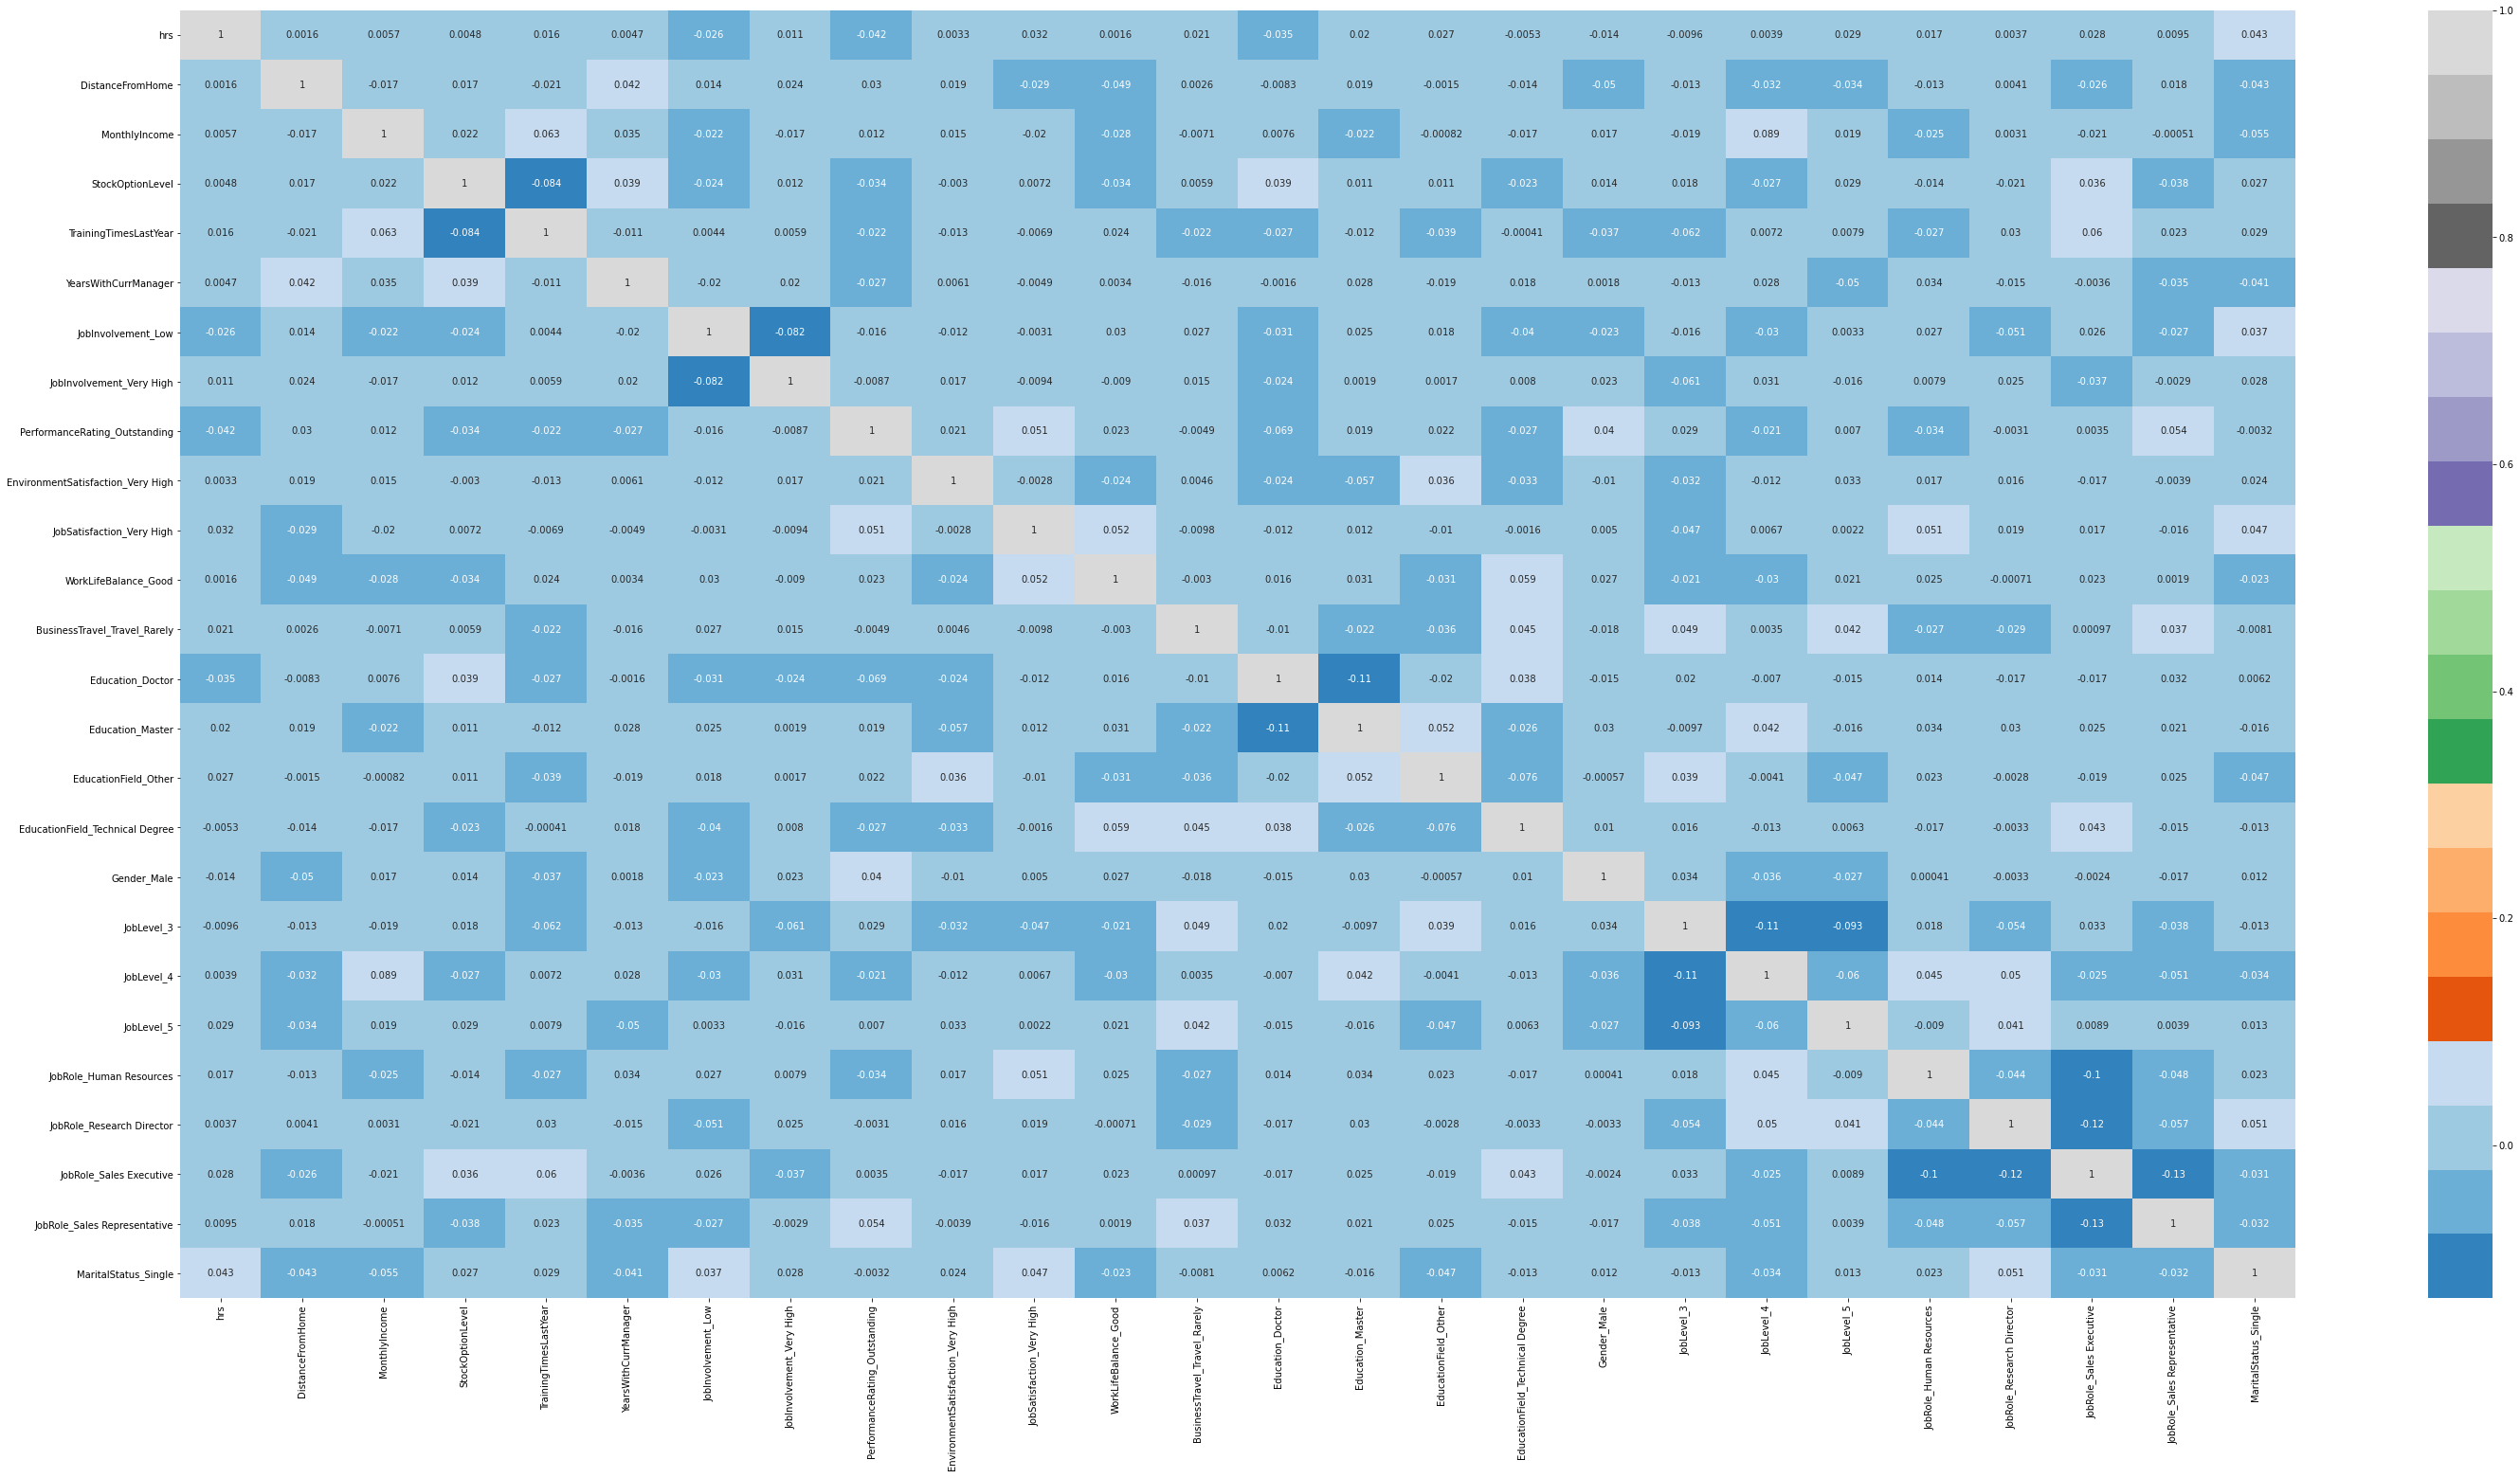

In [122]:
plt.figure(figsize = (50,25))
sns.heatmap(X_train.corr(),annot = True,cmap="tab20c")
plt.show()

 # Step 7: Model Building


Let's start by splitting our data into a training set and a test set.
- Running Your First Training Model

# Decision Tree

It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible.

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

In [124]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [125]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 1, 0, ..., 1, 0, 0])

In [126]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  1.0


# VIF

In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

Features   VIF
1      DistanceFromHome  1.02
3      StockOptionLevel  1.02
2         MonthlyIncome  1.02
5  YearsWithCurrManager  1.01
0                   hrs  1.01

In [128]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)


[]


In [129]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

hrs  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
537   2.429327         -0.282194       0.141772         -0.935020   
1881 -0.175435          0.088223       0.046708         -0.935020   
2367 -0.179239         -0.899556       0.167505         -0.935020   
3618  0.365562          1.199474      -0.594493          0.237936   
1398 -1.145968          0.211695       0.112423          1.410893   

      TrainingTimesLastYear  YearsWithCurrManager  JobInvolvement_Low  \
537                2.498059             -1.157795                   0   
1881               0.154895             -0.597068                   0   
2367               1.717004              0.804751                   0   
3618              -0.626160             -1.157795                   0   
1398              -0.626160              1.365479                   0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
537                          0                              1   
1881                         0                              0   
2367                         0                              0   
3618                         0                              0   
1398                         0                              1   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
537                                   1                          1   
1881                                  1                          0   
2367                                  0                          0   
3618                                  0                          0   
1398                                  1                          0   

      WorkLifeBalance_Good  BusinessTravel_Travel_Rarely  Education_Doctor  \
537                      0                             1                 0   
1881                     0                             1                 0   
2367                     0                             1                 0   
3618                     0                             0                 0   
1398                     0                             1                 0   

      Education_Master  EducationField_Other  EducationField_Technical Degree  \
537                  1                     0                                0   
1881                 1                     0                                0   
2367                 1                     0                                0   
3618                 0                     0                                0   
1398                 0                     0                                0   

      Gender_Male  JobLevel_3  JobLevel_4  JobLevel_5  \
537             1           0           1           0   
1881            0           0           1           0   
2367            1           0           0           0   
3618            1           1           0           0   
1398            0           0           0           0   

      JobRole_Human Resources  JobRole_Research Director  \
537                         0                          0   
1881                        1                          0   
2367                        0                          0   
3618                        0                          0   
1398                        0                          0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
537                         1                             0   
1881                        0                             0   
2367                        0                             0   
3618                        0                             0   
1398                        1                             0   

      MaritalStatus_Single  
537                      0  
1881                     0  
2367                     0  
3618                     1  
1398                     0

In [130]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()


hrs  DistanceFromHome  MonthlyIncome  StockOptionLevel  \
4019  0.001523          2.434197       0.079884          0.237936   
1697  1.063991          1.569891      -0.908182          0.237936   
2481 -0.171973          0.829057       0.064998          0.237936   
1039  0.420040         -0.899556       0.021613          1.410893   
93   -0.327932         -0.899556      -0.155116         -0.935020   

      TrainingTimesLastYear  YearsWithCurrManager  JobInvolvement_Low  \
4019              -0.626160             -1.157795                   0   
1697               0.935950             -0.316704                   0   
2481              -0.626160              1.085115                   0   
1039               0.154895             -0.036340                   0   
93                -2.188269              0.804751                   0   

      JobInvolvement_Very High  PerformanceRating_Outstanding  \
4019                         1                              0   
1697                         0                              0   
2481                         0                              0   
1039                         0                              0   
93                           0                              0   

      EnvironmentSatisfaction_Very High  JobSatisfaction_Very High  \
4019                                  0                          0   
1697                                  0                          0   
2481                                  0                          1   
1039                                  1                          0   
93                                    0                          0   

      WorkLifeBalance_Good  BusinessTravel_Travel_Rarely  Education_Doctor  \
4019                     0                             1                 0   
1697                     1                             1                 0   
2481                     0                             1                 0   
1039                     0                             1                 0   
93                       0                             1                 0   

      Education_Master  EducationField_Other  EducationField_Technical Degree  \
4019                 0                     0                                0   
1697                 1                     0                                0   
2481                 0                     0                                0   
1039                 0                     0                                1   
93                   0                     0                                0   

      Gender_Male  JobLevel_3  JobLevel_4  JobLevel_5  \
4019            1           0           0           0   
1697            1           0           0           0   
2481            0           0           0           0   
1039            0           1           0           0   
93              1           0           0           0   

      JobRole_Human Resources  JobRole_Research Director  \
4019                        0                          0   
1697                        0                          0   
2481                        0                          0   
1039                        0                          0   
93                          0                          0   

      JobRole_Sales Executive  JobRole_Sales Representative  \
4019                        0                             0   
1697                        0                             1   
2481                        0                             0   
1039                        1                             0   
93                          0                             0   

      MaritalStatus_Single  
4019                     0  
1697                     0  
2481                     1  
1039                     0  
93                       0

In [131]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [132]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 1, 0, ..., 1, 0, 0])

In [133]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  1.0


In [134]:
# VIF

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12       BusinessTravel_Travel_Rarely  2.42
17                        Gender_Male  2.06
25               MaritalStatus_Single  1.42
10          JobSatisfaction_Very High  1.40
9   EnvironmentSatisfaction_Very High  1.37
14                   Education_Master  1.35
23            JobRole_Sales Executive  1.31
11               WorkLifeBalance_Good  1.29
8       PerformanceRating_Outstanding  1.20
18                         JobLevel_3  1.20
7            JobInvolvement_Very High  1.11
16    EducationField_Technical Degree  1.11
19                         JobLevel_4  1.10
24       JobRole_Sales Representative  1.10
6                  JobInvolvement_Low  1.08
22          JobRole_Research Director  1.08
21            JobRole_Human Resources  1.07
20                         JobLevel_5  1.07
15               EducationField_Other  1.07
13                   Education_Doctor  1.05
4               TrainingTimesLastYear  1.03
1                    DistanceFromHome  1.02
3                    StockOptionLevel  1.02
2                       MonthlyIncome  1.02
5                YearsWithCurrManager  1.01
0                                 hrs  1.01

In [136]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[2575    0]
 [   0  511]]


In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

1.0

In [139]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity


1.0

In [140]:
# Calculate false postive rate - predicting Attrition when customer does not have Attrited
print(FP/ float(TN+FP))

0.0


In [141]:
# Positive predictive value 
print (TP / float(TP+FP))

1.0


# Plotting the ROC Curve

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

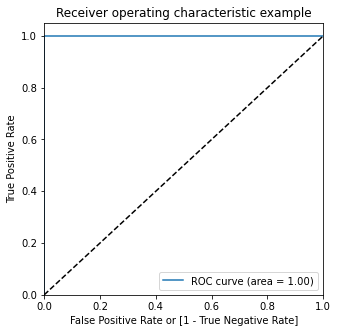

In [143]:
draw_roc(y_train,predict_train)

# Precision and Recall

In [144]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

1.0

In [145]:
recall_score(y_train,predict_train)

1.0

# Making predictions on the test set

In [146]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [0 0 0 ... 0 1 0]


In [147]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1095   28]
 [  27  173]]


In [148]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.9584278155706727

In [149]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

1.0

In [150]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

1.0

# Final Observation:

In [151]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :100.0 %
Train Data Sensitivity :100.0 %
Train Data Specificity :100.0 %
Test Data Accuracy     :95.84 %
Test Data Sensitivity  :100.0 %
Test Data Specificity  :100.0 %
